<h1 style="font-size:22px;color:red"> Traitement des données </h1>

<h2 style="font-size:19px;color:blue"> Import des fichiers et modules nécessaires </h2>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import datetime
import warnings
warnings.simplefilter('ignore')
import sklearn as sk
from sklearn import decomposition, preprocessing
from sklearn import cluster, metrics
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import scipy as sp
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [2]:
Population = pd.read_csv('Population_2000_2018.csv', sep=',')
Dispo_alim = pd.read_csv('DisponibiliteAlimentaire_2017.csv', sep=',')

<h2 style="font-size:19px;color:blue"> Vue d'ensemble des dataframes fournis dans l'étude </h2>

In [3]:
print(Population.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4411 entries, 0 to 4410
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            4411 non-null   object 
 1   Domaine                 4411 non-null   object 
 2   Code zone               4411 non-null   int64  
 3   Zone                    4411 non-null   object 
 4   Code Élément            4411 non-null   int64  
 5   Élément                 4411 non-null   object 
 6   Code Produit            4411 non-null   int64  
 7   Produit                 4411 non-null   object 
 8   Code année              4411 non-null   int64  
 9   Année                   4411 non-null   int64  
 10  Unité                   4411 non-null   object 
 11  Valeur                  4411 non-null   float64
 12  Symbole                 4411 non-null   object 
 13  Description du Symbole  4411 non-null   object 
 14  Note                    258 non-null    

In [4]:
print(Dispo_alim.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176600 entries, 0 to 176599
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Code Domaine            176600 non-null  object 
 1   Domaine                 176600 non-null  object 
 2   Code zone               176600 non-null  int64  
 3   Zone                    176600 non-null  object 
 4   Code Élément            176600 non-null  int64  
 5   Élément                 176600 non-null  object 
 6   Code Produit            176600 non-null  int64  
 7   Produit                 176600 non-null  object 
 8   Code année              176600 non-null  int64  
 9   Année                   176600 non-null  int64  
 10  Unité                   176600 non-null  object 
 11  Valeur                  176600 non-null  float64
 12  Symbole                 176600 non-null  object 
 13  Description du Symbole  176600 non-null  object 
dtypes: float64(1), int64

In [5]:
Dispo_alim.head(45)

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2511,Blé et produits,2017,2017,Milliers de tonnes,4281.00,S,Données standardisées
1,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,2302.00,S,Données standardisées
2,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2511,Blé et produits,2017,2017,Milliers de tonnes,-119.00,S,Données standardisées
3,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5911,Exportations - Quantité,2511,Blé et produits,2017,2017,Milliers de tonnes,0.00,S,Données standardisées
4,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2511,Blé et produits,2017,2017,Milliers de tonnes,6701.00,S,Données standardisées
5,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5521,Aliments pour animaux,2511,Blé et produits,2017,2017,Milliers de tonnes,76.00,S,Données standardisées
6,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5527,Semences,2511,Blé et produits,2017,2017,Milliers de tonnes,344.00,S,Données standardisées
7,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5123,Pertes,2511,Blé et produits,2017,2017,Milliers de tonnes,642.00,S,Données standardisées
8,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5170,Résidus,2511,Blé et produits,2017,2017,Milliers de tonnes,0.00,S,Données standardisées
9,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5142,Nourriture,2511,Blé et produits,2017,2017,Milliers de tonnes,5640.00,S,Données standardisées


- Le dataframe DispoAlim représente pour chaque type de produits de chaque pays pour l'année 2017 les données sur : Production, import-export, Varia stock, Export, dispo intérieure, alim animaux, semances, pertes, résidus, nourr, dispo alim par personnes ...

In [6]:
Population.head(40)

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,20779.953,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2001,2001,1000 personnes,21606.988,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2002,2002,1000 personnes,22600.770,X,Sources internationales sûres,NaN
3,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2003,2003,1000 personnes,23680.871,X,Sources internationales sûres,NaN
4,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2004,2004,1000 personnes,24726.684,X,Sources internationales sûres,NaN
5,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2005,2005,1000 personnes,25654.277,X,Sources internationales sûres,NaN
6,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2006,2006,1000 personnes,26433.049,X,Sources internationales sûres,NaN
7,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2007,2007,1000 personnes,27100.536,X,Sources internationales sûres,NaN
8,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2008,2008,1000 personnes,27722.276,X,Sources internationales sûres,NaN
9,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2009,2009,1000 personnes,28394.813,X,Sources internationales sûres,NaN


- Population = Population totale pour chaque année de 2000 à 2018 compris.
- Très peu de données dans la colonne "Note"

In [7]:
print(Dispo_alim.describe())

           Code zone   Code Élément   Code Produit  Code année     Année  \
count  176600.000000  176600.000000  176600.000000    176600.0  176600.0   
mean      125.474740    3810.052894    2628.778545      2017.0    2017.0   
std        72.941699    2211.790089      91.993247         0.0       0.0   
min         1.000000     645.000000    2511.000000      2017.0    2017.0   
25%        63.000000     684.000000    2556.000000      2017.0    2017.0   
50%       120.000000    5142.000000    2612.000000      2017.0    2017.0   
75%       188.000000    5301.000000    2732.000000      2017.0    2017.0   
max       276.000000    5911.000000    2899.000000      2017.0    2017.0   

              Valeur  
count  176600.000000  
mean      210.554918  
std      4762.047787  
min    -10388.000000  
25%         0.000000  
50%         0.120000  
75%         8.462500  
max    758548.000000  


In [8]:
print(Population.describe())

         Code zone  Code Élément  Code Produit   Code année        Année  \
count  4411.000000        4411.0        4411.0  4411.000000  4411.000000   
mean    132.202902         511.0        3010.0  2009.068238  2009.068238   
std      75.854840           0.0           0.0     5.481539     5.481539   
min       1.000000         511.0        3010.0  2000.000000  2000.000000   
25%      68.000000         511.0        3010.0  2004.000000  2004.000000   
50%     132.000000         511.0        3010.0  2009.000000  2009.000000   
75%     195.000000         511.0        3010.0  2014.000000  2014.000000   
max     299.000000         511.0        3010.0  2018.000000  2018.000000   

             Valeur  
count  4.411000e+03  
mean   2.963004e+04  
std    1.238029e+05  
min    7.850000e-01  
25%    3.921890e+02  
50%    4.764741e+03  
75%    1.821548e+04  
max    1.427648e+06  


<h2 style="font-size:19px;color:blue"> Traitement de ces données </h2>

### Traitement du df "Dispo_Alim"

In [9]:
# Trier les lignes "Viande de Volailles" du df Dispo_Alim
Dispo_alim = Dispo_alim[(Dispo_alim['Produit'] == 'Viande de Volailles')]
Dispo_alim

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
651,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5511,Production,2734,Viande de Volailles,2017,2017,Milliers de tonnes,28.00,S,Données standardisées
652,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5611,Importations - Quantité,2734,Viande de Volailles,2017,2017,Milliers de tonnes,29.00,S,Données standardisées
653,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5072,Variation de stock,2734,Viande de Volailles,2017,2017,Milliers de tonnes,0.00,S,Données standardisées
654,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5301,Disponibilité intérieure,2734,Viande de Volailles,2017,2017,Milliers de tonnes,57.00,S,Données standardisées
655,FBS,Nouveaux Bilans Alimentaire,2,Afghanistan,5123,Pertes,2734,Viande de Volailles,2017,2017,Milliers de tonnes,2.00,S,Données standardisées
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176396,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,5142,Nourriture,2734,Viande de Volailles,2017,2017,Milliers de tonnes,67.00,S,Données standardisées
176397,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,645,Disponibilité alimentaire en quantité (kg/pers...,2734,Viande de Volailles,2017,2017,kg,4.68,Fc,Donnée calculée
176398,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,664,Disponibilité alimentaire (Kcal/personne/jour),2734,Viande de Volailles,2017,2017,Kcal/personne/jour,16.00,Fc,Donnée calculée
176399,FBS,Nouveaux Bilans Alimentaire,181,Zimbabwe,674,Disponibilité de protéines en quantité (g/pers...,2734,Viande de Volailles,2017,2017,g/personne/jour,1.59,Fc,Donnée calculée


In [10]:
Dispo_alim = Dispo_alim[['Zone', 'Élément', 'Produit', 'Unité', 'Valeur']]
Dispo_alim = Dispo_alim.pivot_table(index='Zone', columns='Élément', values='Valeur').reset_index()
Dispo_alim = Dispo_alim.rename_axis(None, axis=1)
Dispo_alim

,Zone,Alimentation pour touristes,Aliments pour animaux,Autres utilisations (non alimentaire),Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Résidus,Semences,Traitement,Variation de stock
0,Afghanistan,NaN,NaN,NaN,5.0,1.53,0.33,0.54,57.0,NaN,29.0,55.0,2.0,28.0,0.0,NaN,NaN,0.0
1,Afrique du Sud,0.0,NaN,NaN,143.0,35.69,9.25,14.11,2118.0,63.0,514.0,2035.0,83.0,1667.0,0.0,NaN,NaN,0.0
2,Albanie,NaN,NaN,NaN,85.0,16.36,6.45,6.26,47.0,0.0,38.0,47.0,NaN,13.0,0.0,NaN,NaN,4.0
3,Algérie,0.0,NaN,NaN,22.0,6.38,1.50,1.97,277.0,0.0,2.0,264.0,13.0,275.0,0.0,NaN,NaN,0.0
4,Allemagne,NaN,NaN,NaN,71.0,19.47,4.16,7.96,1739.0,646.0,842.0,1609.0,NaN,1514.0,-38.0,NaN,167.0,-29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,Émirats arabes unis,NaN,NaN,NaN,147.0,43.47,9.25,14.80,412.0,94.0,433.0,412.0,NaN,48.0,0.0,NaN,NaN,-26.0
168,Équateur,0.0,NaN,NaN,83.0,19.31,6.35,6.15,341.0,0.0,0.0,324.0,17.0,340.0,0.0,NaN,NaN,-1.0
169,États-Unis d'Amérique,NaN,NaN,89.0,219.0,55.68,14.83,19.93,18266.0,3692.0,123.0,18100.0,NaN,21914.0,0.0,NaN,77.0,80.0
170,Éthiopie,0.0,NaN,NaN,0.0,0.13,0.03,0.04,14.0,NaN,1.0,14.0,1.0,14.0,0.0,NaN,NaN,0.0


In [11]:
print(Dispo_alim.isnull().sum())

Zone                                                               0
Alimentation pour touristes                                       94
Aliments pour animaux                                            171
Autres utilisations (non alimentaire)                            138
Disponibilité alimentaire (Kcal/personne/jour)                     0
Disponibilité alimentaire en quantité (kg/personne/an)             0
Disponibilité de matière grasse en quantité (g/personne/jour)      0
Disponibilité de protéines en quantité (g/personne/jour)           0
Disponibilité intérieure                                           2
Exportations - Quantité                                           37
Importations - Quantité                                            2
Nourriture                                                         2
Pertes                                                           105
Production                                                         4
Résidus                           

In [12]:
Dispo_alim = Dispo_alim[['Zone', 
                         'Disponibilité alimentaire (Kcal/personne/jour)', 
                         'Disponibilité alimentaire en quantité (kg/personne/an)', 
                         #'Disponibilité de matière grasse en quantité (g/personne/jour)', 
                         'Disponibilité intérieure', 
                         #'Exportations - Quantité', 
                         'Importations - Quantité', 
                         'Nourriture', 
                         'Production', 
                         #'Résidus', 
                         #'Variation de stock'
                        ]]
Dispo_alim

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité intérieure,Importations - Quantité,Nourriture,Production
0,Afghanistan,5.0,1.53,57.0,29.0,55.0,28.0
1,Afrique du Sud,143.0,35.69,2118.0,514.0,2035.0,1667.0
2,Albanie,85.0,16.36,47.0,38.0,47.0,13.0
3,Algérie,22.0,6.38,277.0,2.0,264.0,275.0
4,Allemagne,71.0,19.47,1739.0,842.0,1609.0,1514.0
...,...,...,...,...,...,...,...
167,Émirats arabes unis,147.0,43.47,412.0,433.0,412.0,48.0
168,Équateur,83.0,19.31,341.0,0.0,324.0,340.0
169,États-Unis d'Amérique,219.0,55.68,18266.0,123.0,18100.0,21914.0
170,Éthiopie,0.0,0.13,14.0,1.0,14.0,14.0


In [13]:
Dispo_alim.rename(columns={'Disponibilité intérieure': 'Disponibilité intérieure (Milliers T)'}, inplace=True)
Dispo_alim.rename(columns={'Exportations - Quantité': 'Exportations (Qt, Milliers T)'}, inplace=True)
Dispo_alim.rename(columns={'Importations - Quantité': 'Importations (Qt, Milliers T)'}, inplace=True)
Dispo_alim.rename(columns={'Nourriture': 'Nourriture (Milliers T)'}, inplace=True)
Dispo_alim.rename(columns={'Production': 'Production (Milliers T)'}, inplace=True)
Dispo_alim.rename(columns={'Résidus': 'Résidus (Milliers T)'}, inplace=True)
Dispo_alim.rename(columns={'Variation de stock': 'Variation de stock (Milliers T)'}, inplace=True)
Dispo_alim

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité intérieure (Milliers T),"Importations (Qt, Milliers T)",Nourriture (Milliers T),Production (Milliers T)
0,Afghanistan,5.0,1.53,57.0,29.0,55.0,28.0
1,Afrique du Sud,143.0,35.69,2118.0,514.0,2035.0,1667.0
2,Albanie,85.0,16.36,47.0,38.0,47.0,13.0
3,Algérie,22.0,6.38,277.0,2.0,264.0,275.0
4,Allemagne,71.0,19.47,1739.0,842.0,1609.0,1514.0
...,...,...,...,...,...,...,...
167,Émirats arabes unis,147.0,43.47,412.0,433.0,412.0,48.0
168,Équateur,83.0,19.31,341.0,0.0,324.0,340.0
169,États-Unis d'Amérique,219.0,55.68,18266.0,123.0,18100.0,21914.0
170,Éthiopie,0.0,0.13,14.0,1.0,14.0,14.0


In [14]:
# Vérification ligne en double
Dispo_alim.duplicated().sum()

0

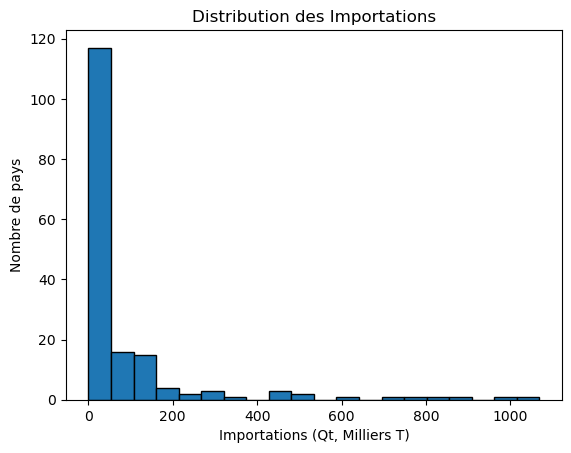

In [15]:
# Histogramme des importations

plt.hist(Dispo_alim["Importations (Qt, Milliers T)"], bins=20, edgecolor='k')
plt.xlabel("Importations (Qt, Milliers T)")
plt.ylabel("Nombre de pays")
plt.title("Distribution des Importations")
plt.show()

- La grande majorité des pays ont importé moins de 50 milliers de tonnes de viandes de volaille en 2017

### Traitement du df population

In [16]:
Population.head()

,Code Domaine,Domaine,Code zone,Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2000,2000,1000 personnes,20779.953,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2001,2001,1000 personnes,21606.988,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2002,2002,1000 personnes,22600.770,X,Sources internationales sûres,NaN
3,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2003,2003,1000 personnes,23680.871,X,Sources internationales sûres,NaN
4,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2004,2004,1000 personnes,24726.684,X,Sources internationales sûres,NaN


In [17]:
Population = Population[['Zone', 'Année', 'Valeur']]
Population['Valeur'] = Population['Valeur']*1000
Population['Valeur'] = Population['Valeur'].astype(int)
Population.rename(columns={'Valeur': 'Population'}, inplace=True)
Population

,Zone,Année,Population
0,Afghanistan,2000,20779953
1,Afghanistan,2001,21606988
2,Afghanistan,2002,22600770
3,Afghanistan,2003,23680871
4,Afghanistan,2004,24726684
...,...,...,...
4406,Zimbabwe,2014,13586707
4407,Zimbabwe,2015,13814629
4408,Zimbabwe,2016,14030331
4409,Zimbabwe,2017,14236595


In [18]:
Population = Population.pivot_table(index='Zone', columns='Année', values='Population').reset_index()
Population = Population.rename_axis(None, axis=1)
Population

,Zone,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,20779953.0,21606988.0,22600770.0,23680871.0,24726684.0,25654277.0,26433049.0,27100536.0,27722276.0,28394813.0,29185507.0,30117413.0,31161376.0,32269589.0,33370794.0,34413603.0,35383032.0,36296113.0,37171921.0
1,Afrique du Sud,44967708.0,45571274.0,46150913.0,46719196.0,47291610.0,47880601.0,48489459.0,49119759.0,49779471.0,50477011.0,51216964.0,52003755.0,52832658.0,53687121.0,54544186.0,55386367.0,56207646.0,57009756.0,57792518.0
2,Albanie,3129243.0,3129704.0,3126187.0,3118023.0,3104892.0,3086810.0,3063021.0,3033998.0,3002678.0,2973048.0,2948023.0,2928592.0,2914096.0,2903790.0,2896305.0,2890513.0,2886438.0,2884169.0,2882740.0
3,Algérie,31042235.0,31451514.0,31855109.0,32264157.0,32692163.0,33149724.0,33641002.0,34166972.0,34730608.0,35333881.0,35977455.0,36661445.0,37383895.0,38140133.0,38923692.0,39728025.0,40551392.0,41389189.0,42228408.0
4,Allemagne,81400882.0,81453885.0,81535122.0,81614380.0,81646474.0,81602741.0,81472226.0,81277830.0,81065752.0,80899961.0,80827002.0,80855632.0,80972628.0,81174367.0,81450378.0,81787411.0,82193768.0,82658409.0,83124418.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,Îles Salomon,412660.0,423944.0,435432.0,447017.0,458539.0,469918.0,481078.0,492132.0,503360.0,515181.0,527861.0,541521.0,556063.0,571336.0,587079.0,603118.0,619438.0,636039.0,652857.0
234,Îles Turques-et-Caïques,20164.0,21573.0,23232.0,25011.0,26700.0,28180.0,29391.0,30385.0,31202.0,31934.0,32659.0,33377.0,34066.0,34731.0,35369.0,35981.0,36559.0,37115.0,37665.0
235,Îles Vierges américaines,108722.0,108691.0,108561.0,108360.0,108092.0,107794.0,107462.0,107115.0,106756.0,106412.0,106087.0,105793.0,105534.0,105303.0,105114.0,104958.0,104835.0,104751.0,104680.0
236,Îles Vierges britanniques,20311.0,20675.0,21129.0,21672.0,22334.0,23107.0,24023.0,25047.0,26097.0,27039.0,27794.0,28319.0,28650.0,28847.0,28989.0,29152.0,29355.0,29577.0,29802.0


In [19]:
print(Population.isnull().sum())

Zone    0
2000    9
2001    9
2002    9
2003    9
2004    9
2005    9
2006    8
2007    8
2008    8
2009    8
2010    8
2011    3
2012    2
2013    2
2014    2
2015    2
2016    2
2017    2
2018    2
dtype: int64


In [20]:
# Vérification ligne en double
Population.duplicated().sum()

0

In [21]:
# Identifier les pays dont la population est NaN
Année_nan = Population.loc[Population.isnull().any(axis=1)]
Année_nan.head(20)

,Zone,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
26,"Bonaire, Saint-Eustache et Saba",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21993.0,22842.0,23505.0,24070.0,24570.0,25020.0,25401.0,25711.0
52,Curaçao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,152315.0,154817.0,156794.0,158422.0,159847.0,161052.0,161997.0,162752.0
125,Monténégro,NaN,NaN,NaN,NaN,NaN,NaN,617860.0,619555.0,621320.0,622939.0,624275.0,625270.0,625925.0,626345.0,626645.0,626956.0,627264.0,627563.0,627809.0
169,Saint-Barthélemy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9343.0,9439.0,9537.0,9623.0,9693.0,9748.0,9784.0,9816.0
172,Saint-Martin (partie française),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37446.0,37009.0,36453.0,36015.0,35858.0,36065.0,36560.0,37264.0
181,Serbie,NaN,NaN,NaN,NaN,NaN,NaN,9145914.0,9101185.0,9060103.0,9023357.0,8991254.0,8963769.0,8940113.0,8918904.0,8898289.0,8876777.0,8853963.0,8829628.0,8802754.0
182,Serbie-et-Monténégro,10101175.0,10023939.0,9959836.0,9906313.0,9857775.0,9810216.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
186,Sint Maarten (partie néerlandaise),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35058.0,36241.0,37583.0,38876.0,39968.0,40808.0,41444.0,41940.0
190,Soudan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36193783.0,37072550.0,37977655.0,38902950.0,39847439.0,40813397.0,41801533.0
191,Soudan (ex),33474409.0,34418875.0,35393004.0,36396195.0,37427544.0,38485448.0,39569229.0,40675760.0,41797776.0,42926047.0,44053377.0,45180380.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Les pays dont la population est NaN sont principalement des reconstitutions géographiques :
##### - Bonaire, Saint-Eustrache et Saba - Curaçao - Sint Maarten formaient il y a peu les Antilles Néerlandaise, et Saint Barthélemy était rattaché à la Guadeloupe
##### - Le Monténégro et la Serbie formaient la Serbie - et - Monténégro, tandis que le Soudan (ex) était composé du Soudan + du Soudan du Sud qui a récemment obtenu son indépendance.

In [22]:
# Remplacer les NaN par des 0
Population = Population.fillna(0)
Population

,Zone,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,20779953.0,21606988.0,22600770.0,23680871.0,24726684.0,25654277.0,26433049.0,27100536.0,27722276.0,28394813.0,29185507.0,30117413.0,31161376.0,32269589.0,33370794.0,34413603.0,35383032.0,36296113.0,37171921.0
1,Afrique du Sud,44967708.0,45571274.0,46150913.0,46719196.0,47291610.0,47880601.0,48489459.0,49119759.0,49779471.0,50477011.0,51216964.0,52003755.0,52832658.0,53687121.0,54544186.0,55386367.0,56207646.0,57009756.0,57792518.0
2,Albanie,3129243.0,3129704.0,3126187.0,3118023.0,3104892.0,3086810.0,3063021.0,3033998.0,3002678.0,2973048.0,2948023.0,2928592.0,2914096.0,2903790.0,2896305.0,2890513.0,2886438.0,2884169.0,2882740.0
3,Algérie,31042235.0,31451514.0,31855109.0,32264157.0,32692163.0,33149724.0,33641002.0,34166972.0,34730608.0,35333881.0,35977455.0,36661445.0,37383895.0,38140133.0,38923692.0,39728025.0,40551392.0,41389189.0,42228408.0
4,Allemagne,81400882.0,81453885.0,81535122.0,81614380.0,81646474.0,81602741.0,81472226.0,81277830.0,81065752.0,80899961.0,80827002.0,80855632.0,80972628.0,81174367.0,81450378.0,81787411.0,82193768.0,82658409.0,83124418.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,Îles Salomon,412660.0,423944.0,435432.0,447017.0,458539.0,469918.0,481078.0,492132.0,503360.0,515181.0,527861.0,541521.0,556063.0,571336.0,587079.0,603118.0,619438.0,636039.0,652857.0
234,Îles Turques-et-Caïques,20164.0,21573.0,23232.0,25011.0,26700.0,28180.0,29391.0,30385.0,31202.0,31934.0,32659.0,33377.0,34066.0,34731.0,35369.0,35981.0,36559.0,37115.0,37665.0
235,Îles Vierges américaines,108722.0,108691.0,108561.0,108360.0,108092.0,107794.0,107462.0,107115.0,106756.0,106412.0,106087.0,105793.0,105534.0,105303.0,105114.0,104958.0,104835.0,104751.0,104680.0
236,Îles Vierges britanniques,20311.0,20675.0,21129.0,21672.0,22334.0,23107.0,24023.0,25047.0,26097.0,27039.0,27794.0,28319.0,28650.0,28847.0,28989.0,29152.0,29355.0,29577.0,29802.0


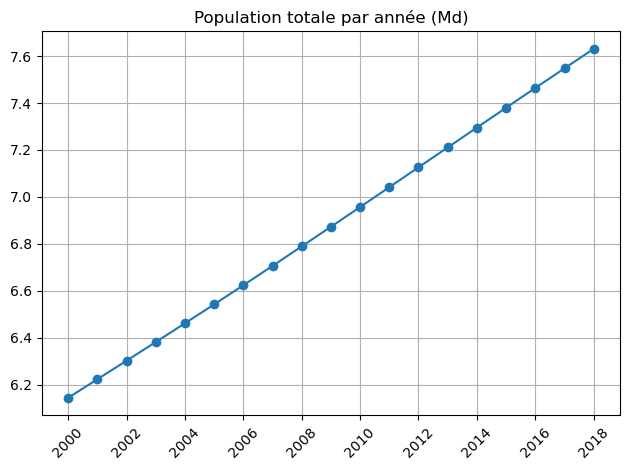

In [23]:
Année = Population.columns[1:]
PopTot = Population[Année].sum()
Année = pd.to_datetime(Année, format='%Y') # Format date
PopTot = PopTot / 1e9 # Conversion en milliards

plt.plot(Année, PopTot, marker='o')

plt.title('Population totale par année (Md)')
plt.xticks(rotation=45)  # Rotation des étiquettes de l'axe des abscisses

plt.tight_layout()
plt.grid(True)
plt.show()

- La population mondiale est croissante sur toute la période référencée par notre étude. 
- Légèrement inférieure à 6.2 Milliards d'habitants en 2000, elle culmine à plus de 7.6 milliards en 2018. 
- Celà représente une augmentation de 22.58% sur la période, soit 1.26% chaque année.

### Création d'un df Population 2017

In [24]:
Pop2017 = Population[['Zone', 2017]]
Pop2017.rename(columns={2017 : 'Population'}, inplace=True)
Pop2017['Population'] = Pop2017['Population'].fillna(0)
Pop2017['Population'] = Pop2017['Population'].astype(int)
Pop2017 = Pop2017.rename_axis(None, axis=1)
Pop2017.head()

,Zone,Population
0,Afghanistan,36296113
1,Afrique du Sud,57009756
2,Albanie,2884169
3,Algérie,41389189
4,Allemagne,82658409


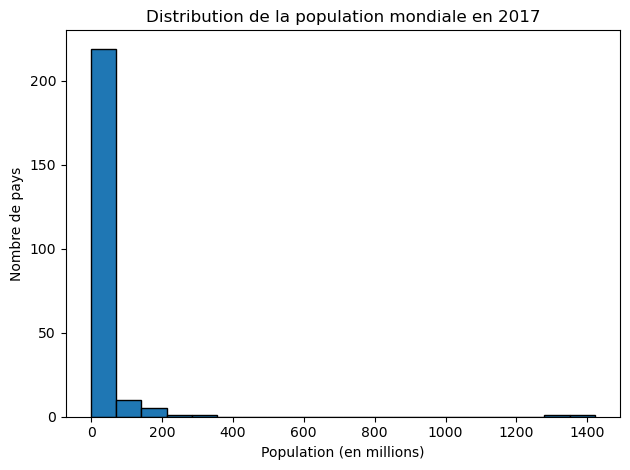

In [25]:
Pop2017M = Pop2017['Population'] / 1000000

plt.hist(Pop2017M, bins=20, edgecolor='black')
plt.xlabel("Population (en millions)")
plt.ylabel("Nombre de pays")
plt.title("Distribution de la population mondiale en 2017")
plt.tight_layout()
plt.show()

- La grande majorité des pays sont peuplés de moins de 50 millions d'habitants
- Les deux valeurs de 1.3 et 1.4 milliards représente l'Inde et la Chine

In [26]:
Pop2017M.describe()

count     238.000000
mean       31.714849
std       131.369771
min         0.000000
25%         0.375814
50%         5.030324
75%        19.023033
max      1421.021791
Name: Population, dtype: float64

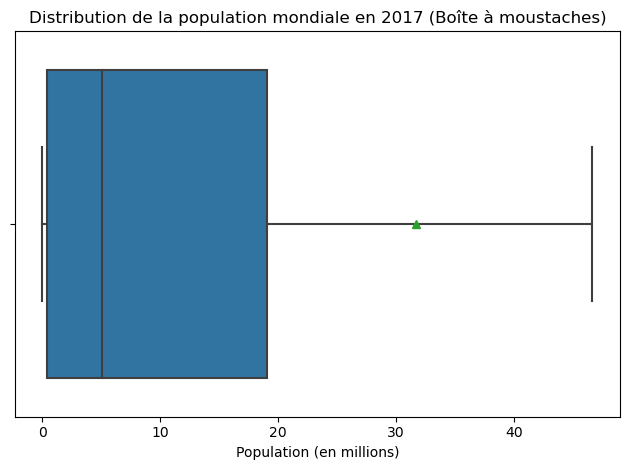

In [27]:
sns.boxplot(x=Pop2017M, orient='h',showfliers=False, showmeans=True)

plt.xlabel("Population (en millions)")
plt.title("Distribution de la population mondiale en 2017 (Boîte à moustaches)")
plt.tight_layout()
plt.show()

- En moyenne, chaque pays compte une population de 31,7 millions d'habitants. 50% des pays ont une population inférieure à 5,03 millions, tandis que les 50% restants ont une population supérieure à 5 millions.
- La segmentation territoriale de notre Dataframe est basée sur les données de la FAO. Elle inclut des régions qui ne sont pas définies comme "pays" selon les critères de l'ONU, mais qui possèdent leurs propres frontières et identités culturelles distinctes. Cette classification englobe donc une variété d'îles et de territoires peu peuplés qui sont comptés comme des pays, ce qui influe sur les moyennes, les quartiles et la médiane en les abaissant.

In [28]:
print("La Population mondiale est de", Pop2017['Population'].sum(), "en 2017")

La Population mondiale est de 7548134107 en 2017


<h2 style="font-size:19px;color:blue"> Imports de df supplémentaires pour réaliser l'étude PESTEL </h2>

In [29]:
Indices_poulet = pd.read_csv('Poulet_indices_commerce.csv', sep=',')
Stabilité_pol = pd.read_csv('Stabilité_pol.csv', sep=',')
PIB = pd.read_csv('PIB2017.csv', sep=',')
Dist = pd.read_excel('dist_cepii.xls')

<h2 style="font-size:19px;color:blue"> Nettoyage des données </h2>

### df indices_poulet

In [30]:
Indices_poulet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12632 entries, 0 to 12631
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Code Domaine            12632 non-null  object
 1   Domaine                 12632 non-null  object
 2   Code zone (ISO3)        12632 non-null  object
 3   Zone                    12632 non-null  object
 4   Code Élément            12632 non-null  int64 
 5   Élément                 12632 non-null  object
 6   Code Produit (CPC)      12632 non-null  int64 
 7   Produit                 12632 non-null  object
 8   Code année              12632 non-null  int64 
 9   Année                   12632 non-null  int64 
 10  Unité                   12632 non-null  object
 11  Valeur                  12632 non-null  int64 
 12  Symbole                 12632 non-null  object
 13  Description du Symbole  12632 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.3+ MB


In [31]:
Indices_poulet.head(20)

,Code Domaine,Domaine,Code zone (ISO3),Zone,Code Élément,Élément,Code Produit (CPC),Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole
0,TI,Indices commerciaux,NLD,Pays-Bas (Royaume des),64,Valeur des importations - Quantité période de ...,21121,"Viande, poulet, fraîche ou réfrigérée",2010,2010,1000 $,619417,E,Valeur estimée
1,TI,Indices commerciaux,NLD,Pays-Bas (Royaume des),64,Valeur des importations - Quantité période de ...,21121,"Viande, poulet, fraîche ou réfrigérée",2011,2011,1000 $,615210,E,Valeur estimée
2,TI,Indices commerciaux,NLD,Pays-Bas (Royaume des),64,Valeur des importations - Quantité période de ...,21121,"Viande, poulet, fraîche ou réfrigérée",2012,2012,1000 $,614295,E,Valeur estimée
3,TI,Indices commerciaux,NLD,Pays-Bas (Royaume des),64,Valeur des importations - Quantité période de ...,21121,"Viande, poulet, fraîche ou réfrigérée",2013,2013,1000 $,618125,E,Valeur estimée
4,TI,Indices commerciaux,NLD,Pays-Bas (Royaume des),64,Valeur des importations - Quantité période de ...,21121,"Viande, poulet, fraîche ou réfrigérée",2014,2014,1000 $,573086,E,Valeur estimée
5,TI,Indices commerciaux,NLD,Pays-Bas (Royaume des),64,Valeur des importations - Quantité période de ...,21121,"Viande, poulet, fraîche ou réfrigérée",2015,2015,1000 $,628075,E,Valeur estimée
6,TI,Indices commerciaux,NLD,Pays-Bas (Royaume des),64,Valeur des importations - Quantité période de ...,21121,"Viande, poulet, fraîche ou réfrigérée",2016,2016,1000 $,658127,E,Valeur estimée
7,TI,Indices commerciaux,NLD,Pays-Bas (Royaume des),64,Valeur des importations - Quantité période de ...,21121,"Viande, poulet, fraîche ou réfrigérée",2017,2017,1000 $,708821,E,Valeur estimée
8,TI,Indices commerciaux,NLD,Pays-Bas (Royaume des),65,Valeur des importations - Prix période de réfé...,21121,"Viande, poulet, fraîche ou réfrigérée",2010,2010,1000 $,670651,E,Valeur estimée
9,TI,Indices commerciaux,NLD,Pays-Bas (Royaume des),65,Valeur des importations - Prix période de réfé...,21121,"Viande, poulet, fraîche ou réfrigérée",2011,2011,1000 $,768667,E,Valeur estimée


#### Récupération de la colonne code zone et zone qui seront utile par la suite

In [32]:
Code_zone = Indices_poulet[['Code zone (ISO3)', 'Zone']]
Code_zone

,Code zone (ISO3),Zone
0,NLD,Pays-Bas (Royaume des)
1,NLD,Pays-Bas (Royaume des)
2,NLD,Pays-Bas (Royaume des)
3,NLD,Pays-Bas (Royaume des)
4,NLD,Pays-Bas (Royaume des)
...,...,...
12627,ZWE,Zimbabwe
12628,ZWE,Zimbabwe
12629,ZWE,Zimbabwe
12630,ZWE,Zimbabwe


In [33]:
Indices_poulet.describe()

,Code Élément,Code Produit (CPC),Code année,Année,Valeur
count,12632.000000,12632.0,12632.000000,12632.000000,1.263200e+04
mean,316.130462,21121.0,2013.563965,2013.563965,6.308178e+04
std,196.077346,0.0,2.274356,2.274356,3.439700e+05
min,64.000000,21121.0,2010.000000,2010.000000,0.000000e+00
25%,94.000000,21121.0,2012.000000,2012.000000,8.900000e+01
50%,462.000000,21121.0,2014.000000,2014.000000,1.160000e+02
75%,465.000000,21121.0,2016.000000,2016.000000,4.452500e+03
max,495.000000,21121.0,2017.000000,2017.000000,7.791316e+06


In [34]:
print(Indices_poulet.isnull().sum())

Code Domaine              0
Domaine                   0
Code zone (ISO3)          0
Zone                      0
Code Élément              0
Élément                   0
Code Produit (CPC)        0
Produit                   0
Code année                0
Année                     0
Unité                     0
Valeur                    0
Symbole                   0
Description du Symbole    0
dtype: int64


In [35]:
valeur_diff = Indices_poulet['Unité'].unique()
print(valeur_diff)

['1000 $' 'indice']


In [36]:
Indices_poulet = Indices_poulet[['Zone', 'Élément', 'Année', 'Unité', 'Valeur']]
Indices_poulet

,Zone,Élément,Année,Unité,Valeur
0,Pays-Bas (Royaume des),Valeur des importations - Quantité période de ...,2010,1000 $,619417
1,Pays-Bas (Royaume des),Valeur des importations - Quantité période de ...,2011,1000 $,615210
2,Pays-Bas (Royaume des),Valeur des importations - Quantité période de ...,2012,1000 $,614295
3,Pays-Bas (Royaume des),Valeur des importations - Quantité période de ...,2013,1000 $,618125
4,Pays-Bas (Royaume des),Valeur des importations - Quantité période de ...,2014,1000 $,573086
...,...,...,...,...,...
12627,Zimbabwe,Indice de quantité d'importation (2014-2016 = ...,2013,indice,80
12628,Zimbabwe,Indice de quantité d'importation (2014-2016 = ...,2014,indice,98
12629,Zimbabwe,Indice de quantité d'importation (2014-2016 = ...,2015,indice,102
12630,Zimbabwe,Indice de quantité d'importation (2014-2016 = ...,2016,indice,100


In [37]:
# Vérification ligne en double
Indices_poulet.duplicated().sum()

0

In [38]:
Indices_poulet.head(50)

,Zone,Élément,Année,Unité,Valeur
0,Pays-Bas (Royaume des),Valeur des importations - Quantité période de ...,2010,1000 $,619417
1,Pays-Bas (Royaume des),Valeur des importations - Quantité période de ...,2011,1000 $,615210
2,Pays-Bas (Royaume des),Valeur des importations - Quantité période de ...,2012,1000 $,614295
3,Pays-Bas (Royaume des),Valeur des importations - Quantité période de ...,2013,1000 $,618125
4,Pays-Bas (Royaume des),Valeur des importations - Quantité période de ...,2014,1000 $,573086
5,Pays-Bas (Royaume des),Valeur des importations - Quantité période de ...,2015,1000 $,628075
6,Pays-Bas (Royaume des),Valeur des importations - Quantité période de ...,2016,1000 $,658127
7,Pays-Bas (Royaume des),Valeur des importations - Quantité période de ...,2017,1000 $,708821
8,Pays-Bas (Royaume des),Valeur des importations - Prix période de réfé...,2010,1000 $,670651
9,Pays-Bas (Royaume des),Valeur des importations - Prix période de réfé...,2011,1000 $,768667


### Création de deux df : indice et valeur

In [39]:
Poulet_valeur = Indices_poulet.query('Unité == "1000 $"').copy()
Poulet_indice = Indices_poulet.query('Unité == "indice"').copy()
print(Poulet_indice.head())
print(Poulet_valeur.head())

                      Zone                                            Élément  \
32  Pays-Bas (Royaume des)  Indice de valeur des importations (2014-2016 =...   
33  Pays-Bas (Royaume des)  Indice de valeur des importations (2014-2016 =...   
34  Pays-Bas (Royaume des)  Indice de valeur des importations (2014-2016 =...   
35  Pays-Bas (Royaume des)  Indice de valeur des importations (2014-2016 =...   
36  Pays-Bas (Royaume des)  Indice de valeur des importations (2014-2016 =...   

    Année   Unité  Valeur  
32   2010  indice     109  
33   2011  indice     124  
34   2012  indice     119  
35   2013  indice     109  
36   2014  indice     103  
                     Zone                                            Élément  \
0  Pays-Bas (Royaume des)  Valeur des importations - Quantité période de ...   
1  Pays-Bas (Royaume des)  Valeur des importations - Quantité période de ...   
2  Pays-Bas (Royaume des)  Valeur des importations - Quantité période de ...   
3  Pays-Bas (Royaume des)

In [40]:
print(Poulet_indice['Unité'].unique())
print(Poulet_valeur['Unité'].unique())

['indice']
['1000 $']


In [41]:
Poulet_valeur2017 = Poulet_valeur.query('Année == 2017')
Poulet_valeur2017['Valeur'] = Poulet_valeur2017['Valeur'] / 10 # conversion en millions de $
Poulet_valeur2017 = Poulet_valeur2017[['Zone', 'Élément', 'Valeur']]
Poulet_valeur2017 = Poulet_valeur2017.pivot_table(index='Zone', columns='Élément', values='Valeur').reset_index()
Poulet_valeur2017 = Poulet_valeur2017.rename_axis(None, axis=1)
Poulet_valeur2017

,Zone,Valeur des exportations - Prix période de référence,Valeur des exportations - Quantité période de référence,Valeur des importations - Prix période de référence,Valeur des importations - Quantité période de référence
0,Afghanistan,NaN,NaN,3657.9,4033.9
1,Afrique du Sud,7916.6,10235.5,46569.8,39137.6
2,Albanie,NaN,NaN,2299.6,1963.0
3,Algérie,2.3,9.5,1.3,1.1
4,Allemagne,104373.5,104403.7,180713.1,152983.8
...,...,...,...,...,...
189,États-Unis d'Amérique,386736.8,367025.0,24640.5,26609.0
190,Éthiopie,0.2,0.2,83.6,18.2
191,Îles Cook,NaN,NaN,249.1,188.8
192,Îles Féroé,NaN,NaN,169.7,200.0


In [42]:
Poulet_valeur2017.isnull().sum()

Zone                                                        0
Valeur des exportations - Prix période de référence        70
Valeur des exportations - Quantité période de référence    70
Valeur des importations - Prix période de référence         0
Valeur des importations - Quantité période de référence     0
dtype: int64

In [43]:
Poulet_valeur2017.rename(columns={'Valeur des exportations - Prix période de référence': 'Export - Prix - (M $)'}, inplace=True)
Poulet_valeur2017.rename(columns={'Valeur des exportations - Quantité période de référence': 'Export - Qt - (M $)'}, inplace=True)
Poulet_valeur2017.rename(columns={'Valeur des importations - Prix période de référence': 'Import - Prix - (M $)'}, inplace=True)
Poulet_valeur2017.rename(columns={'Valeur des importations - Quantité période de référence': 'Import - Qt - (M $)'}, inplace=True)
Poulet_valeur2017

,Zone,Export - Prix - (M $),Export - Qt - (M $),Import - Prix - (M $),Import - Qt - (M $)
0,Afghanistan,NaN,NaN,3657.9,4033.9
1,Afrique du Sud,7916.6,10235.5,46569.8,39137.6
2,Albanie,NaN,NaN,2299.6,1963.0
3,Algérie,2.3,9.5,1.3,1.1
4,Allemagne,104373.5,104403.7,180713.1,152983.8
...,...,...,...,...,...
189,États-Unis d'Amérique,386736.8,367025.0,24640.5,26609.0
190,Éthiopie,0.2,0.2,83.6,18.2
191,Îles Cook,NaN,NaN,249.1,188.8
192,Îles Féroé,NaN,NaN,169.7,200.0


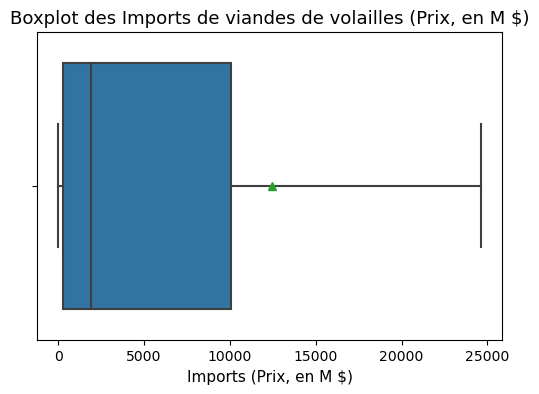

In [44]:
plt.figure(figsize=(6,4))
sns.boxplot(data=Poulet_valeur2017, x='Import - Prix - (M $)', orient='h', showfliers=False, showmeans=True)

plt.title('Boxplot des Imports de viandes de volailles (Prix, en M $)', fontsize = 13)
plt.xlabel('Imports (Prix, en M $)', fontsize = 11)

plt.show()

- Les importations en prix (M) représentent la somme totale des importations de viandes de volailles
- La majorité des pays de notre dataframe importent peu de viandes de volaille. Les grands importateurs contribuent à fortement augmenter la moyenne ainsi que les quartiles

In [46]:
Poulet_indice.head()

,Zone,Élément,Année,Unité,Valeur
32,Pays-Bas (Royaume des),Indice de valeur des importations (2014-2016 =...,2010,indice,109
33,Pays-Bas (Royaume des),Indice de valeur des importations (2014-2016 =...,2011,indice,124
34,Pays-Bas (Royaume des),Indice de valeur des importations (2014-2016 =...,2012,indice,119
35,Pays-Bas (Royaume des),Indice de valeur des importations (2014-2016 =...,2013,indice,109
36,Pays-Bas (Royaume des),Indice de valeur des importations (2014-2016 =...,2014,indice,103


In [47]:
Poulet_indice2017 = Poulet_indice.query('Année == 2017')
Poulet_indice2017 = Poulet_indice2017[['Zone', 'Élément', 'Valeur']]
Poulet_indice2017 = Poulet_indice2017.pivot_table(index='Zone', columns='Élément', values='Valeur').reset_index()
Poulet_indice2017 = Poulet_indice2017.rename_axis(None, axis=1)
Poulet_indice2017

,Zone,Indice de quantité d'exportation (2014-2016 = 100),Indice de quantité d'importation (2014-2016 = 100),Indice de valeur d'exportation (2014-2016 = 100),Indice de valeur des importations (2014-2016 = 100),Indice de valeur unitaire à l'export (2014-2016 = 100),Indice de valeur unitaire à l'import (2014-2016 = 100)
0,Afghanistan,NaN,72.0,NaN,57.0,NaN,80.0
1,Afrique du Sud,90.0,128.0,106.0,139.0,116.0,106.0
2,Albanie,NaN,85.0,NaN,61.0,NaN,72.0
3,Algérie,27.0,129.0,30.0,147.0,112.0,55.0
4,Allemagne,96.0,112.0,92.0,107.0,96.0,95.0
...,...,...,...,...,...,...,...
189,États-Unis d'Amérique,99.0,91.0,93.0,89.0,95.0,98.0
190,Éthiopie,156.0,272.0,298.0,161.0,190.0,53.0
191,Îles Cook,NaN,127.0,NaN,122.0,NaN,96.0
192,Îles Féroé,NaN,87.0,NaN,89.0,NaN,102.0


In [48]:
Poulet_indice2017.rename(columns={"Indice de quantité d'exportation (2014-2016 = 100)": 'Indice Export (Qt, 2015)'}, inplace=True)
Poulet_indice2017.rename(columns={"Indice de quantité d'importation (2014-2016 = 100)": 'Indice Import (Qt, 2015)'}, inplace=True)
Poulet_indice2017.rename(columns={"Indice de valeur d'exportation (2014-2016 = 100)": 'Indice Export (Valeur, 2015)'}, inplace=True)
Poulet_indice2017.rename(columns={"Indice de valeur des importations (2014-2016 = 100)": 'Indice Import (Valeur, 2015)'}, inplace=True)
Poulet_indice2017.rename(columns={"Indice de valeur unitaire à l'export (2014-2016 = 100)": 'Indice Export (Valeur unitaire, 2015)'}, inplace=True)
Poulet_indice2017.rename(columns={"Indice de valeur unitaire à l'import (2014-2016 = 100)": 'Indice Import (Valeur unitaire, 2015)'}, inplace=True)
Poulet_indice2017

,Zone,"Indice Export (Qt, 2015)","Indice Import (Qt, 2015)","Indice Export (Valeur, 2015)","Indice Import (Valeur, 2015)","Indice Export (Valeur unitaire, 2015)","Indice Import (Valeur unitaire, 2015)"
0,Afghanistan,NaN,72.0,NaN,57.0,NaN,80.0
1,Afrique du Sud,90.0,128.0,106.0,139.0,116.0,106.0
2,Albanie,NaN,85.0,NaN,61.0,NaN,72.0
3,Algérie,27.0,129.0,30.0,147.0,112.0,55.0
4,Allemagne,96.0,112.0,92.0,107.0,96.0,95.0
...,...,...,...,...,...,...,...
189,États-Unis d'Amérique,99.0,91.0,93.0,89.0,95.0,98.0
190,Éthiopie,156.0,272.0,298.0,161.0,190.0,53.0
191,Îles Cook,NaN,127.0,NaN,122.0,NaN,96.0
192,Îles Féroé,NaN,87.0,NaN,89.0,NaN,102.0


In [49]:
Poulet_indice2017.head()

,Zone,"Indice Export (Qt, 2015)","Indice Import (Qt, 2015)","Indice Export (Valeur, 2015)","Indice Import (Valeur, 2015)","Indice Export (Valeur unitaire, 2015)","Indice Import (Valeur unitaire, 2015)"
0,Afghanistan,NaN,72.0,NaN,57.0,NaN,80.0
1,Afrique du Sud,90.0,128.0,106.0,139.0,116.0,106.0
2,Albanie,NaN,85.0,NaN,61.0,NaN,72.0
3,Algérie,27.0,129.0,30.0,147.0,112.0,55.0
4,Allemagne,96.0,112.0,92.0,107.0,96.0,95.0


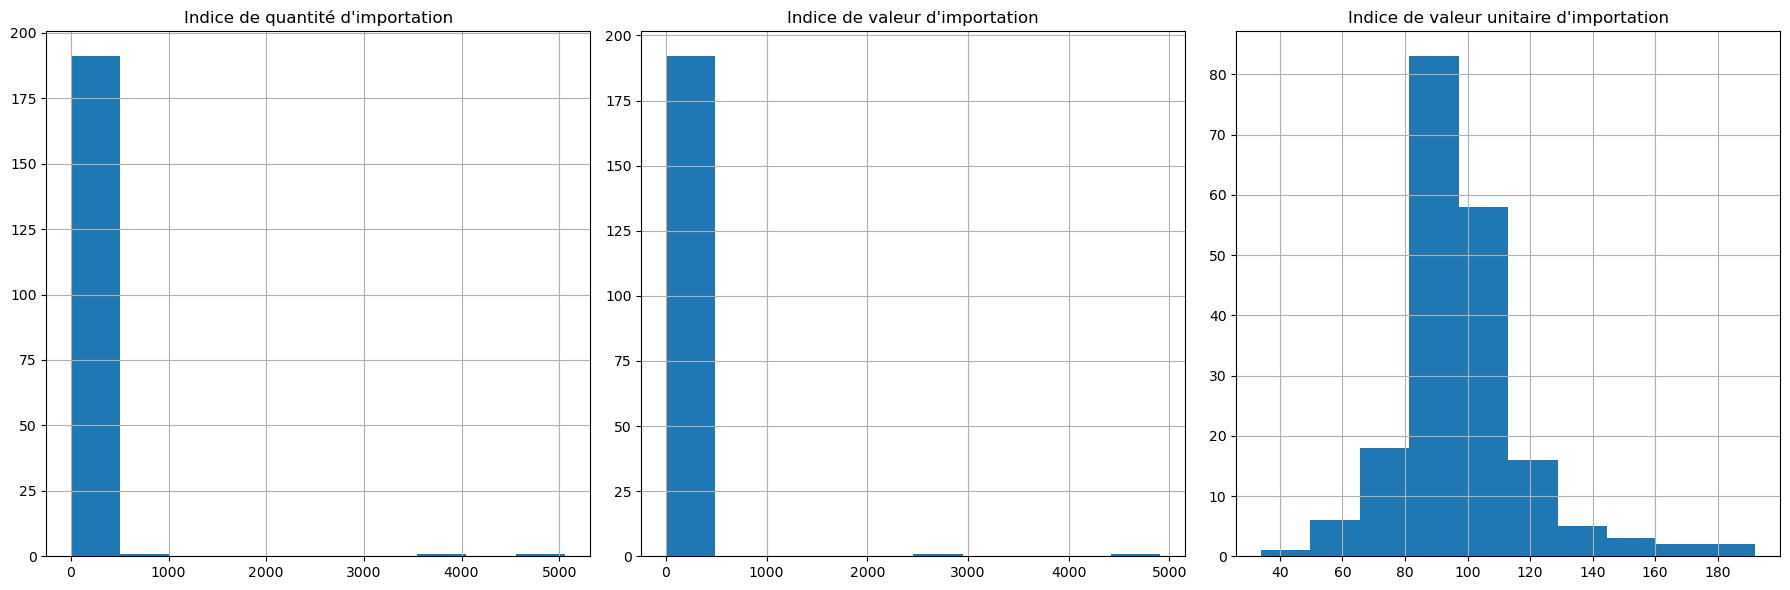

In [50]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

Poulet_indice2017.hist(column='Indice Import (Qt, 2015)', ax=axes[0])
axes[0].set_title('Indice de quantité d\'importation')

Poulet_indice2017.hist(column='Indice Import (Valeur, 2015)', ax=axes[1])
axes[1].set_title('Indice de valeur d\'importation')

Poulet_indice2017.hist(column='Indice Import (Valeur unitaire, 2015)', ax=axes[2])
axes[2].set_title('Indice de valeur unitaire d\'importation')

plt.tight_layout()
plt.show()

- Indice de quantité d'importation : représente les variations de la somme des quantités pondérées par le prix des produits entrant dans le commerce internationnal, en 2017 par rapport à 2015
- Indice de valeur d'importation : représente les variations des valeurs des importations en prenant en compte le coût, l'assuranced et le fret (CAF), en 2017 par rapport à 2015
- Indice de valeur unitaire d'importation : représente les variations des valeurs unitaires des produits pondérés par les quantités entrants dans le commerce internationnal, en 2017 par rapport à 2015

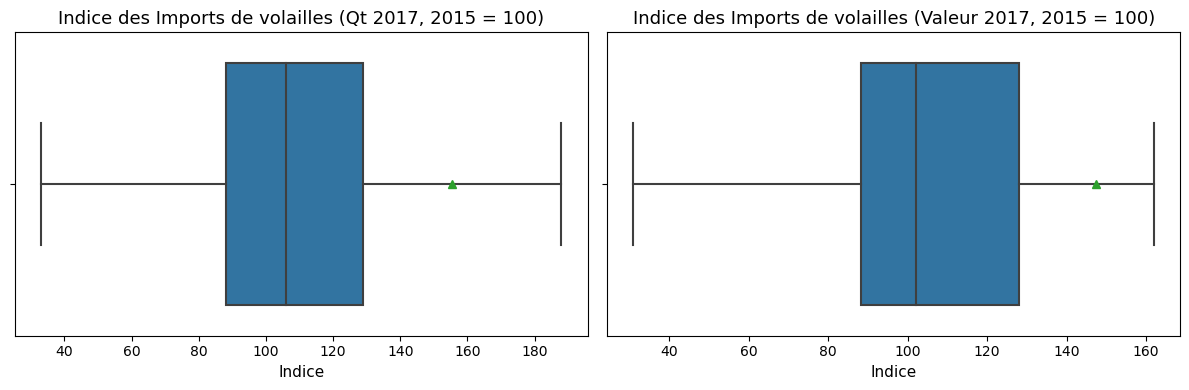

In [51]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Premier boxplot
sns.boxplot(data=Poulet_indice2017, x='Indice Import (Qt, 2015)', orient='h', showfliers=False, showmeans=True, ax=axes[0])
axes[0].set_title('Indice des Imports de volailles (Qt 2017, 2015 = 100)', fontsize=13)
axes[0].set_xlabel('Indice', fontsize=11)

# Deuxième boxplot
sns.boxplot(data=Poulet_indice2017, x='Indice Import (Valeur, 2015)', orient='h', showfliers=False, showmeans=True, ax=axes[1])
axes[1].set_title('Indice des Imports de volailles (Valeur 2017, 2015 = 100)', fontsize=13)
axes[1].set_xlabel('Indice', fontsize=11)

# Ajuster la disposition
plt.tight_layout()

# Afficher le graphique
plt.show()

- Graphiquement, nous voyons que l'indice d'import en Quantité ou en Valeur paraissent identiques.
- L'année 2015 correspondant à 100, la majorité des indices d'importations de 2017 se situent entre 82 et 130. 
- Les outliners observée dans le précédent graphique augmente sensiblement la moyenne, tandis que la valeur médiane se situe à environs 105.

In [52]:
# Trie décroissant de la colonne Indice Import en Quantité
Poulet_indice2017_sorted_desc = Poulet_indice2017.sort_values(by='Indice Import (Qt, 2015)', ascending=False)
Poulet_indice2017_sorted_desc

,Zone,"Indice Export (Qt, 2015)","Indice Import (Qt, 2015)","Indice Export (Valeur, 2015)","Indice Import (Valeur, 2015)","Indice Export (Valeur unitaire, 2015)","Indice Import (Valeur unitaire, 2015)"
117,Nouvelle-Zélande,116.0,5062.0,91.0,4910.0,77.0,128.0
113,Nigéria,NaN,3549.0,NaN,2823.0,NaN,80.0
175,Turquie,116.0,558.0,109.0,209.0,95.0,34.0
164,Sénégal,1995.0,349.0,503.0,388.0,23.0,112.0
108,Myanmar,NaN,282.0,NaN,283.0,NaN,71.0
...,...,...,...,...,...,...,...
172,Trinité-et-Tobago,20.0,9.0,22.0,13.0,105.0,123.0
168,Thaïlande,125.0,9.0,136.0,13.0,107.0,138.0
84,Kenya,70.0,8.0,63.0,15.0,86.0,162.0
188,Érythrée,NaN,6.0,NaN,6.0,NaN,111.0


In [53]:
# Trie décroissant de la colonne Indice Import en Valeur
Poulet_indice2017_sorted_desc2 = Poulet_indice2017.sort_values(by='Indice Import (Valeur, 2015)', ascending=False)
Poulet_indice2017_sorted_desc2

,Zone,"Indice Export (Qt, 2015)","Indice Import (Qt, 2015)","Indice Export (Valeur, 2015)","Indice Import (Valeur, 2015)","Indice Export (Valeur unitaire, 2015)","Indice Import (Valeur unitaire, 2015)"
117,Nouvelle-Zélande,116.0,5062.0,91.0,4910.0,77.0,128.0
113,Nigéria,NaN,3549.0,NaN,2823.0,NaN,80.0
164,Sénégal,1995.0,349.0,503.0,388.0,23.0,112.0
64,Guinée,NaN,175.0,NaN,328.0,NaN,192.0
178,Uruguay,37.0,251.0,25.0,305.0,78.0,122.0
...,...,...,...,...,...,...,...
168,Thaïlande,125.0,9.0,136.0,13.0,107.0,138.0
180,Venezuela (République bolivarienne du),NaN,11.0,NaN,12.0,NaN,104.0
18,Belize,7.0,10.0,85.0,8.0,195.0,78.0
188,Érythrée,NaN,6.0,NaN,6.0,NaN,111.0


### Remplacement des outliers des indices imports par la moyenne

In [54]:
Poulet_indice2017.loc[Poulet_indice2017['Zone'] == 'Nouvelle-Zélande', 'Indice Import (Qt, 2015)'] = Poulet_indice2017['Indice Import (Qt, 2015)'].mean()
Poulet_indice2017.loc[Poulet_indice2017['Zone'] == 'Nouvelle-Zélande', 'Indice Import (Valeur, 2015)'] = Poulet_indice2017['Indice Import (Valeur, 2015)'].mean()

Poulet_indice2017.loc[Poulet_indice2017['Zone'] == 'Nigéria', 'Indice Import (Qt, 2015)'] = Poulet_indice2017['Indice Import (Qt, 2015)'].mean()
Poulet_indice2017.loc[Poulet_indice2017['Zone'] == 'Nigéria', 'Indice Import (Valeur, 2015)'] = Poulet_indice2017['Indice Import (Valeur, 2015)'].mean()

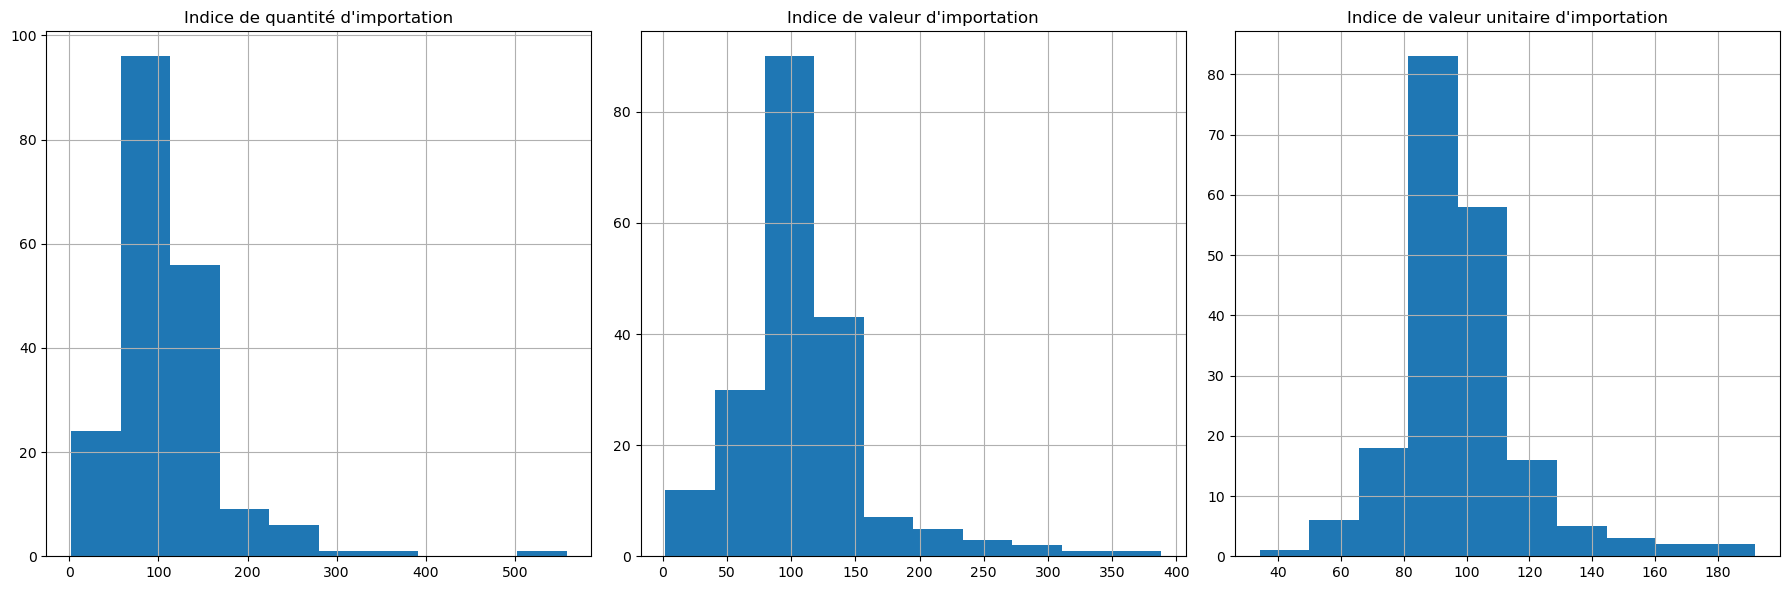

In [55]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

Poulet_indice2017.hist(column='Indice Import (Qt, 2015)', ax=axes[0])
axes[0].set_title('Indice de quantité d\'importation')

Poulet_indice2017.hist(column='Indice Import (Valeur, 2015)', ax=axes[1])
axes[1].set_title('Indice de valeur d\'importation')

Poulet_indice2017.hist(column='Indice Import (Valeur unitaire, 2015)', ax=axes[2])
axes[2].set_title('Indice de valeur unitaire d\'importation')

plt.tight_layout()
plt.show()

### df Stabilité politique

In [56]:
Stabilité_pol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            196 non-null    object 
 1   Domaine                 196 non-null    object 
 2   Code zone (ISO3)        196 non-null    object 
 3   Zone                    196 non-null    object 
 4   Code Élément            196 non-null    int64  
 5   Élément                 196 non-null    object 
 6   Code Produit            196 non-null    int64  
 7   Produit                 196 non-null    object 
 8   Code année              196 non-null    int64  
 9   Année                   196 non-null    int64  
 10  Unité                   196 non-null    object 
 11  Valeur                  196 non-null    float64
 12  Symbole                 196 non-null    object 
 13  Description du Symbole  196 non-null    object 
 14  Note                    0 non-null      fl

In [57]:
Stabilité_pol.head()

,Code Domaine,Domaine,Code zone (ISO3),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,FS,Données de la sécurité alimentaire,NLD,Pays-Bas (Royaume des),6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,0.92,X,Ciffre de sources internationales,NaN
1,FS,Données de la sécurité alimentaire,AFG,Afghanistan,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,-2.80,X,Ciffre de sources internationales,NaN
2,FS,Données de la sécurité alimentaire,ZAF,Afrique du Sud,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,-0.28,X,Ciffre de sources internationales,NaN
3,FS,Données de la sécurité alimentaire,ALB,Albanie,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,0.38,X,Ciffre de sources internationales,NaN
4,FS,Données de la sécurité alimentaire,DZA,Algérie,6125,Valeur,21032,Stabilité politique et absence de violence/ter...,2017,2017,indice,-0.92,X,Ciffre de sources internationales,NaN


In [58]:
# Vérification des différentes valeurs des colonnes
print(Stabilité_pol['Élément'].unique())
print(Stabilité_pol['Unité'].unique())
print(Stabilité_pol['Produit'].unique())

['Valeur']
['indice']
['Stabilité politique et absence de violence/terrorisme (indice)']


In [59]:
Stab_pol = Stabilité_pol[['Zone', 'Valeur']]
Stab_pol.rename(columns={'Valeur' : 'Stabilité politique (indice)'}, inplace=True)
Stab_pol

,Zone,Stabilité politique (indice)
0,Pays-Bas (Royaume des),0.92
1,Afghanistan,-2.80
2,Afrique du Sud,-0.28
3,Albanie,0.38
4,Algérie,-0.92
...,...,...
191,Venezuela (République bolivarienne du),-1.27
192,Viet Nam,0.23
193,Yémen,-2.94
194,Zambie,0.15


In [60]:
# Vérifications lignes en double
Stab_pol.duplicated().sum()

0

In [61]:
Stab_pol.describe()

,Stabilité politique (indice)
count,196.000000
mean,-0.066480
std,0.995164
min,-2.940000
25%,-0.655000
50%,0.035000
75%,0.755000
max,1.920000


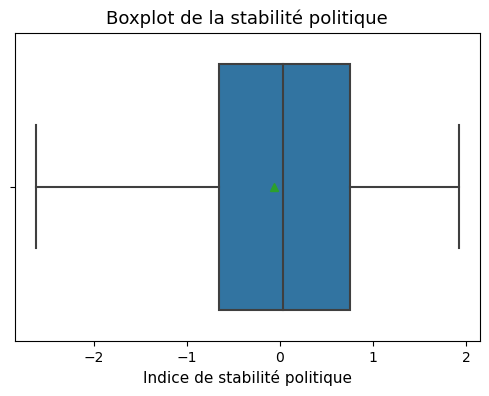

In [62]:
plt.figure(figsize=(6,4))
sns.boxplot(data=Stab_pol, x='Stabilité politique (indice)', orient='h', showfliers=False, showmeans=True)

plt.title('Boxplot de la stabilité politique', fontsize = 13)
plt.xlabel('Indice de stabilité politique', fontsize = 11)

plt.show()

- L'indice de Stabilité Politique moyen des territoires de notre étude est légèrement inférieure à 0 (-0.066)
- La valeur médiane (0.35) indique que 50% des territoires ont un indice inférieur à 0.35, et 50% des autres ont 

### Df PIB / PIB_hab

In [63]:
PIB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            211 non-null    object 
 1   Domaine                 211 non-null    object 
 2   Code zone (ISO3)        211 non-null    object 
 3   Zone                    211 non-null    object 
 4   Code Élément            211 non-null    int64  
 5   Élément                 211 non-null    object 
 6   Code Produit            211 non-null    int64  
 7   Produit                 211 non-null    object 
 8   Code année              211 non-null    int64  
 9   Année                   211 non-null    int64  
 10  Unité                   211 non-null    object 
 11  Valeur                  211 non-null    float64
 12  Symbole                 211 non-null    object 
 13  Description du Symbole  211 non-null    object 
 14  Note                    0 non-null      fl

In [64]:
PIB.head()

,Code Domaine,Domaine,Code zone (ISO3),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,MK,Indicateurs macro,AFG,Afghanistan,6110,Valeur US $,22008,Produit Intérieur Brut,2017,2017,Millions d’USD,1.889635e+04,X,Ciffre de sources internationales,NaN
1,MK,Indicateurs macro,ZAF,Afrique du Sud,6110,Valeur US $,22008,Produit Intérieur Brut,2017,2017,Millions d’USD,3.808514e+05,X,Ciffre de sources internationales,NaN
2,MK,Indicateurs macro,ALB,Albanie,6110,Valeur US $,22008,Produit Intérieur Brut,2017,2017,Millions d’USD,1.301973e+04,X,Ciffre de sources internationales,NaN
3,MK,Indicateurs macro,DZA,Algérie,6110,Valeur US $,22008,Produit Intérieur Brut,2017,2017,Millions d’USD,1.700970e+05,X,Ciffre de sources internationales,NaN
4,MK,Indicateurs macro,DEU,Allemagne,6110,Valeur US $,22008,Produit Intérieur Brut,2017,2017,Millions d’USD,3.690849e+06,X,Ciffre de sources internationales,NaN


In [65]:
PIB = PIB[['Zone', 'Élément', 'Unité', 'Valeur']]
PIB = PIB.pivot_table(index='Zone', columns='Élément', values='Valeur', aggfunc='first').reset_index()
PIB = PIB.rename_axis(None, axis=1)
PIB.head()

,Zone,Valeur US $
0,Afghanistan,1.889635e+04
1,Afrique du Sud,3.808514e+05
2,Albanie,1.301973e+04
3,Algérie,1.700970e+05
4,Allemagne,3.690849e+06


In [66]:
PIB.rename(columns={'Valeur US $' : 'PIB (Mrd $)'}, inplace=True)
PIB['PIB (Mrd $)'] = PIB['PIB (Mrd $)'] / 1000
PIB

,Zone,PIB (Mrd $)
0,Afghanistan,18.896352
1,Afrique du Sud,380.851444
2,Albanie,13.019730
3,Algérie,170.096987
4,Allemagne,3690.849153
...,...,...
206,Îles Cook,0.345609
207,Îles Marshall,0.213062
208,Îles Salomon,1.469790
209,Îles Turques-et-Caïques,1.022365


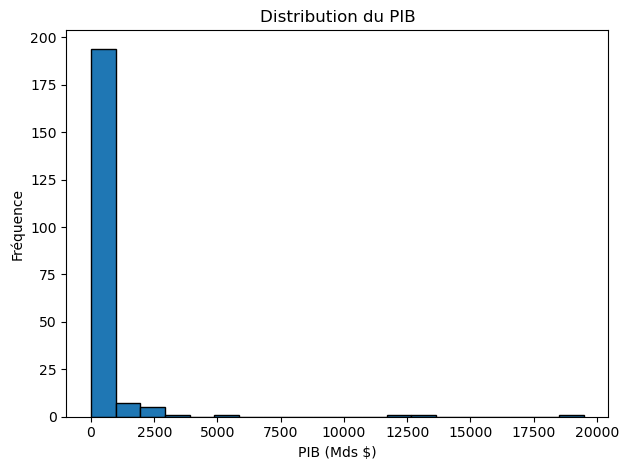

In [67]:
plt.hist(PIB['PIB (Mrd $)'], bins=20, edgecolor='black')
plt.xlabel("PIB (Mds $)")
plt.ylabel("Fréquence")
plt.title("Distribution du PIB")
plt.tight_layout()
plt.show()

- L'extême majorité des pays présent dans notre dataframe ont un faible PIB.

### Df Dist 

- Le Df Dist représente la distance des pays par rapport à la France.
- Nous jugeons plus judicieux et économique l'exportation dans des pays proches

In [68]:
Dist.head()

,iso_o,iso_d,contig,comlang_off,comlang_ethno,colony,comcol,curcol,col45,smctry,dist,distcap,distw,distwces
0,ABW,ABW,0,0,0,0,0,0,0,0,5.225315,5.225315,25.09354,23.04723
1,ABW,AFG,0,0,0,0,0,0,0,0,13257.810000,13257.810000,13168.22,13166.37
2,ABW,AGO,0,0,0,0,0,0,0,0,9516.913000,9516.913000,9587.316,9584.193
3,ABW,AIA,0,0,1,0,0,0,0,0,983.268200,983.268200,976.8974,976.8916
4,ABW,ALB,0,0,0,0,0,0,0,0,9091.742000,9091.742000,9091.576,9091.466


In [69]:
Dist.columns

Index(['iso_o', 'iso_d', 'contig', 'comlang_off', 'comlang_ethno', 'colony',
       'comcol', 'curcol', 'col45', 'smctry', 'dist', 'distcap', 'distw',
       'distwces'],
      dtype='object')

In [70]:
Dist = Dist[['iso_o', 'iso_d', 
      #'contig', 'comlang_off', 'comlang_ethno', 'colony',
       #'comcol', 'curcol', 'col45', 'smctry', 
      'dist',
      #'distcap', 'distw',       'distwces']
      ]]

In [71]:
Dist = Dist.query('iso_o == "FRA"')
Dist.rename(columns={'iso_d' : 'Code zone (ISO3)'}, inplace=True)
Dist

,iso_o,Code zone (ISO3),dist
15008,FRA,NZL,19263.8800
15009,FRA,NFK,17511.6700
15010,FRA,AUS,16975.4600
15011,FRA,TON,16941.4400
15012,FRA,NCL,16757.7400
...,...,...,...
15227,FRA,NLD,427.9169
15228,FRA,GBR,342.9475
15229,FRA,LUX,289.1023
15230,FRA,FRA,278.1876


In [72]:
Dist = pd.merge(Dist, Code_zone, how='left', on='Code zone (ISO3)')
Dist = Dist[['dist', 'Zone']]
Dist.rename(columns={'dist' : 'Distance à la France (km)'}, inplace=True)
Dist

,Distance à la France (km),Zone
0,19263.8800,Nouvelle-Zélande
1,19263.8800,Nouvelle-Zélande
2,19263.8800,Nouvelle-Zélande
3,19263.8800,Nouvelle-Zélande
4,19263.8800,Nouvelle-Zélande
...,...,...
12225,262.3845,Belgique
12226,262.3845,Belgique
12227,262.3845,Belgique
12228,262.3845,Belgique


In [73]:
Dist = Dist.drop_duplicates()
Dist = Dist.dropna()
Dist

,Distance à la France (km),Zone
0,19263.8800,Nouvelle-Zélande
71,16975.4600,Australie
151,16941.4400,Tonga
191,16757.7400,Nouvelle-Calédonie
244,16639.5000,Nioué
...,...,...
11830,427.9169,Pays-Bas (Royaume des)
11910,342.9475,Royaume-Uni de Grande-Bretagne et d'Irlande du...
11990,289.1023,Luxembourg
12070,278.1876,France


<h2 style="font-size:19px;color:blue"> Vue d'ensemble des dataframes </h2>

In [74]:
Dispo_alim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 7 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Zone                                                    172 non-null    object 
 1   Disponibilité alimentaire (Kcal/personne/jour)          172 non-null    float64
 2   Disponibilité alimentaire en quantité (kg/personne/an)  172 non-null    float64
 3   Disponibilité intérieure (Milliers T)                   170 non-null    float64
 4   Importations (Qt, Milliers T)                           170 non-null    float64
 5   Nourriture (Milliers T)                                 170 non-null    float64
 6   Production (Milliers T)                                 168 non-null    float64
dtypes: float64(6), object(1)
memory usage: 9.5+ KB


In [75]:
Dispo_alim.head()

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité intérieure (Milliers T),"Importations (Qt, Milliers T)",Nourriture (Milliers T),Production (Milliers T)
0,Afghanistan,5.0,1.53,57.0,29.0,55.0,28.0
1,Afrique du Sud,143.0,35.69,2118.0,514.0,2035.0,1667.0
2,Albanie,85.0,16.36,47.0,38.0,47.0,13.0
3,Algérie,22.0,6.38,277.0,2.0,264.0,275.0
4,Allemagne,71.0,19.47,1739.0,842.0,1609.0,1514.0


In [76]:
Population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Zone    238 non-null    object 
 1   2000    238 non-null    float64
 2   2001    238 non-null    float64
 3   2002    238 non-null    float64
 4   2003    238 non-null    float64
 5   2004    238 non-null    float64
 6   2005    238 non-null    float64
 7   2006    238 non-null    float64
 8   2007    238 non-null    float64
 9   2008    238 non-null    float64
 10  2009    238 non-null    float64
 11  2010    238 non-null    float64
 12  2011    238 non-null    float64
 13  2012    238 non-null    float64
 14  2013    238 non-null    float64
 15  2014    238 non-null    float64
 16  2015    238 non-null    float64
 17  2016    238 non-null    float64
 18  2017    238 non-null    float64
 19  2018    238 non-null    float64
dtypes: float64(19), object(1)
memory usage: 37.3+ KB


In [77]:
Population.head()

,Zone,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,20779953.0,21606988.0,22600770.0,23680871.0,24726684.0,25654277.0,26433049.0,27100536.0,27722276.0,28394813.0,29185507.0,30117413.0,31161376.0,32269589.0,33370794.0,34413603.0,35383032.0,36296113.0,37171921.0
1,Afrique du Sud,44967708.0,45571274.0,46150913.0,46719196.0,47291610.0,47880601.0,48489459.0,49119759.0,49779471.0,50477011.0,51216964.0,52003755.0,52832658.0,53687121.0,54544186.0,55386367.0,56207646.0,57009756.0,57792518.0
2,Albanie,3129243.0,3129704.0,3126187.0,3118023.0,3104892.0,3086810.0,3063021.0,3033998.0,3002678.0,2973048.0,2948023.0,2928592.0,2914096.0,2903790.0,2896305.0,2890513.0,2886438.0,2884169.0,2882740.0
3,Algérie,31042235.0,31451514.0,31855109.0,32264157.0,32692163.0,33149724.0,33641002.0,34166972.0,34730608.0,35333881.0,35977455.0,36661445.0,37383895.0,38140133.0,38923692.0,39728025.0,40551392.0,41389189.0,42228408.0
4,Allemagne,81400882.0,81453885.0,81535122.0,81614380.0,81646474.0,81602741.0,81472226.0,81277830.0,81065752.0,80899961.0,80827002.0,80855632.0,80972628.0,81174367.0,81450378.0,81787411.0,82193768.0,82658409.0,83124418.0


In [78]:
Pop2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Zone        238 non-null    object
 1   Population  238 non-null    int32 
dtypes: int32(1), object(1)
memory usage: 2.9+ KB


In [79]:
Pop2017.head()

,Zone,Population
0,Afghanistan,36296113
1,Afrique du Sud,57009756
2,Albanie,2884169
3,Algérie,41389189
4,Allemagne,82658409


In [80]:
Indices_poulet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12632 entries, 0 to 12631
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Zone     12632 non-null  object
 1   Élément  12632 non-null  object
 2   Année    12632 non-null  int64 
 3   Unité    12632 non-null  object
 4   Valeur   12632 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 493.6+ KB


In [81]:
Indices_poulet.head()

,Zone,Élément,Année,Unité,Valeur
0,Pays-Bas (Royaume des),Valeur des importations - Quantité période de ...,2010,1000 $,619417
1,Pays-Bas (Royaume des),Valeur des importations - Quantité période de ...,2011,1000 $,615210
2,Pays-Bas (Royaume des),Valeur des importations - Quantité période de ...,2012,1000 $,614295
3,Pays-Bas (Royaume des),Valeur des importations - Quantité période de ...,2013,1000 $,618125
4,Pays-Bas (Royaume des),Valeur des importations - Quantité période de ...,2014,1000 $,573086


In [82]:
Poulet_valeur2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Zone                   194 non-null    object 
 1   Export - Prix - (M $)  124 non-null    float64
 2   Export - Qt - (M $)    124 non-null    float64
 3   Import - Prix - (M $)  194 non-null    float64
 4   Import - Qt - (M $)    194 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.7+ KB


In [83]:
Poulet_valeur2017.head()

,Zone,Export - Prix - (M $),Export - Qt - (M $),Import - Prix - (M $),Import - Qt - (M $)
0,Afghanistan,NaN,NaN,3657.9,4033.9
1,Afrique du Sud,7916.6,10235.5,46569.8,39137.6
2,Albanie,NaN,NaN,2299.6,1963.0
3,Algérie,2.3,9.5,1.3,1.1
4,Allemagne,104373.5,104403.7,180713.1,152983.8


In [84]:
Poulet_indice2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 7 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Zone                                   194 non-null    object 
 1   Indice Export (Qt, 2015)               124 non-null    float64
 2   Indice Import (Qt, 2015)               194 non-null    float64
 3   Indice Export (Valeur, 2015)           126 non-null    float64
 4   Indice Import (Valeur, 2015)           194 non-null    float64
 5   Indice Export (Valeur unitaire, 2015)  124 non-null    float64
 6   Indice Import (Valeur unitaire, 2015)  194 non-null    float64
dtypes: float64(6), object(1)
memory usage: 10.7+ KB


In [85]:
Poulet_indice2017.head()

,Zone,"Indice Export (Qt, 2015)","Indice Import (Qt, 2015)","Indice Export (Valeur, 2015)","Indice Import (Valeur, 2015)","Indice Export (Valeur unitaire, 2015)","Indice Import (Valeur unitaire, 2015)"
0,Afghanistan,NaN,72.0,NaN,57.0,NaN,80.0
1,Afrique du Sud,90.0,128.0,106.0,139.0,116.0,106.0
2,Albanie,NaN,85.0,NaN,61.0,NaN,72.0
3,Algérie,27.0,129.0,30.0,147.0,112.0,55.0
4,Allemagne,96.0,112.0,92.0,107.0,96.0,95.0


In [86]:
Stab_pol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Zone                          196 non-null    object 
 1   Stabilité politique (indice)  196 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.2+ KB


In [87]:
Stab_pol.head()

,Zone,Stabilité politique (indice)
0,Pays-Bas (Royaume des),0.92
1,Afghanistan,-2.80
2,Afrique du Sud,-0.28
3,Albanie,0.38
4,Algérie,-0.92


In [88]:
PIB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Zone         211 non-null    object 
 1   PIB (Mrd $)  211 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


In [89]:
PIB.head()

,Zone,PIB (Mrd $)
0,Afghanistan,18.896352
1,Afrique du Sud,380.851444
2,Albanie,13.019730
3,Algérie,170.096987
4,Allemagne,3690.849153


In [90]:
Dist.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188 entries, 0 to 12150
Data columns (total 2 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Distance à la France (km)  188 non-null    float64
 1   Zone                       188 non-null    object 
dtypes: float64(1), object(1)
memory usage: 4.4+ KB


In [91]:
Dist.head()

,Distance à la France (km),Zone
0,19263.88,Nouvelle-Zélande
71,16975.46,Australie
151,16941.44,Tonga
191,16757.74,Nouvelle-Calédonie
244,16639.50,Nioué


<h2 style="font-size:19px;color:blue"> Jointure pour création du df pour analyse </h2>

In [92]:
Join1 = pd.merge(Dispo_alim, Pop2017, how='left', on='Zone')
Join2 = pd.merge(Join1, Stab_pol, how='left', on='Zone')
Join3 = pd.merge(Join2, PIB, how='left', on='Zone')
Join4 = pd.merge(Join3, Poulet_valeur2017, how='left', on='Zone')
Join5 = pd.merge(Join4, Dist, how='left', on='Zone')
df = pd.merge(Join5, Poulet_indice2017, how='left', on='Zone')
df

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité intérieure (Milliers T),"Importations (Qt, Milliers T)",Nourriture (Milliers T),Production (Milliers T),Population,Stabilité politique (indice),PIB (Mrd $),...,Export - Qt - (M $),Import - Prix - (M $),Import - Qt - (M $),Distance à la France (km),"Indice Export (Qt, 2015)","Indice Import (Qt, 2015)","Indice Export (Valeur, 2015)","Indice Import (Valeur, 2015)","Indice Export (Valeur unitaire, 2015)","Indice Import (Valeur unitaire, 2015)"
0,Afghanistan,5.0,1.53,57.0,29.0,55.0,28.0,36296113,-2.80,18.896352,...,NaN,3657.9,4033.9,5590.3810,NaN,72.0,NaN,57.0,NaN,80.0
1,Afrique du Sud,143.0,35.69,2118.0,514.0,2035.0,1667.0,57009756,-0.28,380.851444,...,10235.5,46569.8,39137.6,9353.5520,90.0,128.0,106.0,139.0,116.0,106.0
2,Albanie,85.0,16.36,47.0,38.0,47.0,13.0,2884169,0.38,13.019730,...,NaN,2299.6,1963.0,1603.5340,NaN,85.0,NaN,61.0,NaN,72.0
3,Algérie,22.0,6.38,277.0,2.0,264.0,275.0,41389189,-0.92,170.096987,...,9.5,1.3,1.1,1340.3900,27.0,129.0,30.0,147.0,112.0,55.0
4,Allemagne,71.0,19.47,1739.0,842.0,1609.0,1514.0,82658409,0.59,3690.849153,...,104403.7,180713.1,152983.8,439.8984,96.0,112.0,92.0,107.0,96.0,95.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,Émirats arabes unis,147.0,43.47,412.0,433.0,412.0,48.0,9487203,0.62,385.605507,...,3952.9,70147.7,79632.8,5249.5350,109.0,93.0,118.0,98.0,104.0,104.0
168,Équateur,83.0,19.31,341.0,0.0,324.0,340.0,16785361,-0.07,104.295862,...,NaN,9.4,35.2,9367.0980,NaN,21.0,NaN,16.0,NaN,79.0
169,États-Unis d'Amérique,219.0,55.68,18266.0,123.0,18100.0,21914.0,325084756,0.29,19477.337000,...,367025.0,24640.5,26609.0,5838.1570,99.0,91.0,93.0,89.0,95.0,98.0
170,Éthiopie,0.0,0.13,14.0,1.0,14.0,14.0,106399924,-1.68,76.794686,...,0.2,83.6,18.2,5582.5020,156.0,272.0,298.0,161.0,190.0,53.0


In [93]:
df.head()

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité intérieure (Milliers T),"Importations (Qt, Milliers T)",Nourriture (Milliers T),Production (Milliers T),Population,Stabilité politique (indice),PIB (Mrd $),...,Export - Qt - (M $),Import - Prix - (M $),Import - Qt - (M $),Distance à la France (km),"Indice Export (Qt, 2015)","Indice Import (Qt, 2015)","Indice Export (Valeur, 2015)","Indice Import (Valeur, 2015)","Indice Export (Valeur unitaire, 2015)","Indice Import (Valeur unitaire, 2015)"
0,Afghanistan,5.0,1.53,57.0,29.0,55.0,28.0,36296113,-2.80,18.896352,...,NaN,3657.9,4033.9,5590.3810,NaN,72.0,NaN,57.0,NaN,80.0
1,Afrique du Sud,143.0,35.69,2118.0,514.0,2035.0,1667.0,57009756,-0.28,380.851444,...,10235.5,46569.8,39137.6,9353.5520,90.0,128.0,106.0,139.0,116.0,106.0
2,Albanie,85.0,16.36,47.0,38.0,47.0,13.0,2884169,0.38,13.019730,...,NaN,2299.6,1963.0,1603.5340,NaN,85.0,NaN,61.0,NaN,72.0
3,Algérie,22.0,6.38,277.0,2.0,264.0,275.0,41389189,-0.92,170.096987,...,9.5,1.3,1.1,1340.3900,27.0,129.0,30.0,147.0,112.0,55.0
4,Allemagne,71.0,19.47,1739.0,842.0,1609.0,1514.0,82658409,0.59,3690.849153,...,104403.7,180713.1,152983.8,439.8984,96.0,112.0,92.0,107.0,96.0,95.0


In [94]:
df.describe()

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité intérieure (Milliers T),"Importations (Qt, Milliers T)",Nourriture (Milliers T),Production (Milliers T),Population,Stabilité politique (indice),PIB (Mrd $),Export - Prix - (M $),Export - Qt - (M $),Import - Prix - (M $),Import - Qt - (M $),Distance à la France (km),"Indice Export (Qt, 2015)","Indice Import (Qt, 2015)","Indice Export (Valeur, 2015)","Indice Import (Valeur, 2015)","Indice Export (Valeur unitaire, 2015)","Indice Import (Valeur unitaire, 2015)"
count,172.000000,172.000000,170.000000,170.000000,170.000000,168.000000,1.720000e+02,167.000000,170.000000,119.000000,119.000000,170.000000,170.000000,167.000000,119.000000,170.000000,120.000000,170.000000,119.000000,170.000000
mean,74.558140,20.213372,687.594118,89.529412,657.047059,725.190476,4.284175e+07,-0.075629,464.849302,19830.142017,18087.663866,13173.490588,12470.155882,6123.046169,1441.294118,114.062385,255.666667,110.808596,97.109244,98.447059
std,60.571277,15.860311,2187.184747,186.669983,2136.545796,2501.457125,1.530637e+08,0.900249,1854.166048,74472.252433,70282.469847,30230.216732,28684.412417,3890.004869,12499.631484,61.824975,1055.415481,54.881278,47.491621,19.960319
min,0.000000,0.130000,2.000000,0.000000,2.000000,0.000000,5.204500e+04,-2.940000,0.188182,0.000000,0.000000,1.300000,1.100000,262.384500,0.000000,8.000000,0.000000,8.000000,0.000000,34.000000
25%,22.000000,6.440000,30.500000,3.000000,28.500000,13.750000,2.874480e+06,-0.635000,11.734994,32.500000,23.900000,361.925000,332.500000,3248.557000,71.500000,90.250000,63.750000,89.250000,82.500000,90.000000
50%,64.000000,18.090000,100.000000,16.000000,99.500000,70.000000,9.757833e+06,-0.040000,43.171303,460.200000,451.100000,1990.000000,1883.350000,5620.005000,105.000000,106.000000,100.500000,102.500000,93.000000,96.000000
75%,105.500000,30.037500,368.250000,81.250000,365.250000,409.750000,3.013874e+07,0.640000,223.174368,6646.950000,6317.900000,12208.000000,10172.275000,8773.450000,133.500000,129.000000,129.750000,127.750000,104.500000,105.000000
max,243.000000,72.310000,18266.000000,1069.000000,18100.000000,21914.000000,1.421022e+09,1.600000,19477.337000,668505.100000,641422.000000,180713.100000,152983.800000,19263.880000,135712.000000,558.000000,10956.000000,388.000000,422.000000,192.000000


In [95]:
df.columns

Index(['Zone', 'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité intérieure (Milliers T)',
       'Importations (Qt, Milliers T)', 'Nourriture (Milliers T)',
       'Production (Milliers T)', 'Population', 'Stabilité politique (indice)',
       'PIB (Mrd $)', 'Export - Prix - (M $)', 'Export - Qt - (M $)',
       'Import - Prix - (M $)', 'Import - Qt - (M $)',
       'Distance à la France (km)', 'Indice Export (Qt, 2015)',
       'Indice Import (Qt, 2015)', 'Indice Export (Valeur, 2015)',
       'Indice Import (Valeur, 2015)', 'Indice Export (Valeur unitaire, 2015)',
       'Indice Import (Valeur unitaire, 2015)'],
      dtype='object')

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172 entries, 0 to 171
Data columns (total 21 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Zone                                                    172 non-null    object 
 1   Disponibilité alimentaire (Kcal/personne/jour)          172 non-null    float64
 2   Disponibilité alimentaire en quantité (kg/personne/an)  172 non-null    float64
 3   Disponibilité intérieure (Milliers T)                   170 non-null    float64
 4   Importations (Qt, Milliers T)                           170 non-null    float64
 5   Nourriture (Milliers T)                                 170 non-null    float64
 6   Production (Milliers T)                                 168 non-null    float64
 7   Population                                              172 non-null    int32  
 8   Stabilité politique (indice)            

<h2 style="font-size:19px;color:blue"> Nouveau tri des variables utiles pour l'analyse </h2>

In [97]:
df = df[['Zone', 'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité alimentaire en quantité (kg/personne/an)',
       #'Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Disponibilité intérieure (Milliers T)',
       #'Exportations (Qt, Milliers T)', 'Importations (Qt, Milliers T',
       'Nourriture (Milliers T)', 'Production (Milliers T)',
       # 'Résidus (Milliers T)', 'Variation de stock (Milliers T)', 
       'Population',
       'Stabilité politique (indice)', 'PIB (Mrd $)',
       #'Export - Prix - (M $)', 'Export - Qt - (M $)', 
       'Import - Prix - (M $)',
       'Import - Qt - (M $)', 
       'Distance à la France (km)',
       #'Indice Export (Qt, 2015)',
       'Indice Import (Qt, 2015)', 
       #'Indice Export (Valeur, 2015)',
       'Indice Import (Valeur, 2015)', 
       #'Indice Export (Valeur unitaire, 2015)',
       'Indice Import (Valeur unitaire, 2015)']]
df

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité intérieure (Milliers T),Nourriture (Milliers T),Production (Milliers T),Population,Stabilité politique (indice),PIB (Mrd $),Import - Prix - (M $),Import - Qt - (M $),Distance à la France (km),"Indice Import (Qt, 2015)","Indice Import (Valeur, 2015)","Indice Import (Valeur unitaire, 2015)"
0,Afghanistan,5.0,1.53,57.0,55.0,28.0,36296113,-2.80,18.896352,3657.9,4033.9,5590.3810,72.0,57.0,80.0
1,Afrique du Sud,143.0,35.69,2118.0,2035.0,1667.0,57009756,-0.28,380.851444,46569.8,39137.6,9353.5520,128.0,139.0,106.0
2,Albanie,85.0,16.36,47.0,47.0,13.0,2884169,0.38,13.019730,2299.6,1963.0,1603.5340,85.0,61.0,72.0
3,Algérie,22.0,6.38,277.0,264.0,275.0,41389189,-0.92,170.096987,1.3,1.1,1340.3900,129.0,147.0,55.0
4,Allemagne,71.0,19.47,1739.0,1609.0,1514.0,82658409,0.59,3690.849153,180713.1,152983.8,439.8984,112.0,107.0,95.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,Émirats arabes unis,147.0,43.47,412.0,412.0,48.0,9487203,0.62,385.605507,70147.7,79632.8,5249.5350,93.0,98.0,104.0
168,Équateur,83.0,19.31,341.0,324.0,340.0,16785361,-0.07,104.295862,9.4,35.2,9367.0980,21.0,16.0,79.0
169,États-Unis d'Amérique,219.0,55.68,18266.0,18100.0,21914.0,325084756,0.29,19477.337000,24640.5,26609.0,5838.1570,91.0,89.0,98.0
170,Éthiopie,0.0,0.13,14.0,14.0,14.0,106399924,-1.68,76.794686,83.6,18.2,5582.5020,272.0,161.0,53.0


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 172 entries, 0 to 171
Data columns (total 15 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Zone                                                    172 non-null    object 
 1   Disponibilité alimentaire (Kcal/personne/jour)          172 non-null    float64
 2   Disponibilité alimentaire en quantité (kg/personne/an)  172 non-null    float64
 3   Disponibilité intérieure (Milliers T)                   170 non-null    float64
 4   Nourriture (Milliers T)                                 170 non-null    float64
 5   Production (Milliers T)                                 168 non-null    float64
 6   Population                                              172 non-null    int32  
 7   Stabilité politique (indice)                            167 non-null    float64
 8   PIB (Mrd $)                             

- Ajout d'une variable "PIB_hab" correspondant au PIB par habitant

In [99]:
df['PIB_hab ($)'] = df['PIB (Mrd $)'] / df['Population']
df['PIB_hab ($)'] = df['PIB_hab ($)'] * 1000000000 # conversion en milliards
df

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité intérieure (Milliers T),Nourriture (Milliers T),Production (Milliers T),Population,Stabilité politique (indice),PIB (Mrd $),Import - Prix - (M $),Import - Qt - (M $),Distance à la France (km),"Indice Import (Qt, 2015)","Indice Import (Valeur, 2015)","Indice Import (Valeur unitaire, 2015)",PIB_hab ($)
0,Afghanistan,5.0,1.53,57.0,55.0,28.0,36296113,-2.80,18.896352,3657.9,4033.9,5590.3810,72.0,57.0,80.0,520.616409
1,Afrique du Sud,143.0,35.69,2118.0,2035.0,1667.0,57009756,-0.28,380.851444,46569.8,39137.6,9353.5520,128.0,139.0,106.0,6680.460869
2,Albanie,85.0,16.36,47.0,47.0,13.0,2884169,0.38,13.019730,2299.6,1963.0,1603.5340,85.0,61.0,72.0,4514.204910
3,Algérie,22.0,6.38,277.0,264.0,275.0,41389189,-0.92,170.096987,1.3,1.1,1340.3900,129.0,147.0,55.0,4109.696066
4,Allemagne,71.0,19.47,1739.0,1609.0,1514.0,82658409,0.59,3690.849153,180713.1,152983.8,439.8984,112.0,107.0,95.0,44651.829108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,Émirats arabes unis,147.0,43.47,412.0,412.0,48.0,9487203,0.62,385.605507,70147.7,79632.8,5249.5350,93.0,98.0,104.0,40644.804048
168,Équateur,83.0,19.31,341.0,324.0,340.0,16785361,-0.07,104.295862,9.4,35.2,9367.0980,21.0,16.0,79.0,6213.501276
169,États-Unis d'Amérique,219.0,55.68,18266.0,18100.0,21914.0,325084756,0.29,19477.337000,24640.5,26609.0,5838.1570,91.0,89.0,98.0,59914.642691
170,Éthiopie,0.0,0.13,14.0,14.0,14.0,106399924,-1.68,76.794686,83.6,18.2,5582.5020,272.0,161.0,53.0,721.755084


- Notre entreprise cherchant à exporter ses poulets à l'international, les données d'imports de chaque pays sont capitales. Nous excluons tout pays dont la donnée sur l'import est manquante

In [100]:
df = df.dropna(subset=['Import - Prix - (M $)'])
df

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité intérieure (Milliers T),Nourriture (Milliers T),Production (Milliers T),Population,Stabilité politique (indice),PIB (Mrd $),Import - Prix - (M $),Import - Qt - (M $),Distance à la France (km),"Indice Import (Qt, 2015)","Indice Import (Valeur, 2015)","Indice Import (Valeur unitaire, 2015)",PIB_hab ($)
0,Afghanistan,5.0,1.53,57.0,55.0,28.0,36296113,-2.80,18.896352,3657.9,4033.9,5590.3810,72.0,57.0,80.0,520.616409
1,Afrique du Sud,143.0,35.69,2118.0,2035.0,1667.0,57009756,-0.28,380.851444,46569.8,39137.6,9353.5520,128.0,139.0,106.0,6680.460869
2,Albanie,85.0,16.36,47.0,47.0,13.0,2884169,0.38,13.019730,2299.6,1963.0,1603.5340,85.0,61.0,72.0,4514.204910
3,Algérie,22.0,6.38,277.0,264.0,275.0,41389189,-0.92,170.096987,1.3,1.1,1340.3900,129.0,147.0,55.0,4109.696066
4,Allemagne,71.0,19.47,1739.0,1609.0,1514.0,82658409,0.59,3690.849153,180713.1,152983.8,439.8984,112.0,107.0,95.0,44651.829108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,Émirats arabes unis,147.0,43.47,412.0,412.0,48.0,9487203,0.62,385.605507,70147.7,79632.8,5249.5350,93.0,98.0,104.0,40644.804048
168,Équateur,83.0,19.31,341.0,324.0,340.0,16785361,-0.07,104.295862,9.4,35.2,9367.0980,21.0,16.0,79.0,6213.501276
169,États-Unis d'Amérique,219.0,55.68,18266.0,18100.0,21914.0,325084756,0.29,19477.337000,24640.5,26609.0,5838.1570,91.0,89.0,98.0,59914.642691
170,Éthiopie,0.0,0.13,14.0,14.0,14.0,106399924,-1.68,76.794686,83.6,18.2,5582.5020,272.0,161.0,53.0,721.755084


- Nous supprimons également les pays dont l'indice de Stabilité politique est manquant car c'est une donnée très importante à connaître pour choisir un pays dans lequel exporter sa production

In [101]:
df = df.dropna(subset=['Stabilité politique (indice)'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166 entries, 0 to 171
Data columns (total 16 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Zone                                                    166 non-null    object 
 1   Disponibilité alimentaire (Kcal/personne/jour)          166 non-null    float64
 2   Disponibilité alimentaire en quantité (kg/personne/an)  166 non-null    float64
 3   Disponibilité intérieure (Milliers T)                   164 non-null    float64
 4   Nourriture (Milliers T)                                 164 non-null    float64
 5   Production (Milliers T)                                 162 non-null    float64
 6   Population                                              166 non-null    int32  
 7   Stabilité politique (indice)                            166 non-null    float64
 8   PIB (Mrd $)                             

### Suppression du marché local

- Dans le cadre de notre volonté d'exportation, nous supprimons la France qui est notre marché local

In [102]:
df = df[df['Zone'] != 'France']
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165 entries, 0 to 171
Data columns (total 16 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Zone                                                    165 non-null    object 
 1   Disponibilité alimentaire (Kcal/personne/jour)          165 non-null    float64
 2   Disponibilité alimentaire en quantité (kg/personne/an)  165 non-null    float64
 3   Disponibilité intérieure (Milliers T)                   163 non-null    float64
 4   Nourriture (Milliers T)                                 163 non-null    float64
 5   Production (Milliers T)                                 161 non-null    float64
 6   Population                                              165 non-null    int32  
 7   Stabilité politique (indice)                            165 non-null    float64
 8   PIB (Mrd $)                             

### Check des valeurs NaN

In [103]:
# Dispo_inter
dispo_inter_nan = df[df['Disponibilité intérieure (Milliers T)'].isna()]
dispo_inter_nan

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité intérieure (Milliers T),Nourriture (Milliers T),Production (Milliers T),Population,Stabilité politique (indice),PIB (Mrd $),Import - Prix - (M $),Import - Qt - (M $),Distance à la France (km),"Indice Import (Qt, 2015)","Indice Import (Valeur, 2015)","Indice Import (Valeur unitaire, 2015)",PIB_hab ($)
113,Ouzbékistan,6.0,1.96,NaN,NaN,NaN,31959785,-0.24,62.081323,647.3,1718.0,5153.064,41.0,44.0,111.0,1942.482490
130,République démocratique populaire lao,41.0,10.91,NaN,NaN,NaN,6953035,0.40,17.071155,784.2,400.3,9245.570,200.0,205.0,104.0,2455.209197


In [104]:
Nourr_inter_nan = df[df['Nourriture (Milliers T)'].isna()]
Nourr_inter_nan

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité intérieure (Milliers T),Nourriture (Milliers T),Production (Milliers T),Population,Stabilité politique (indice),PIB (Mrd $),Import - Prix - (M $),Import - Qt - (M $),Distance à la France (km),"Indice Import (Qt, 2015)","Indice Import (Valeur, 2015)","Indice Import (Valeur unitaire, 2015)",PIB_hab ($)
113,Ouzbékistan,6.0,1.96,NaN,NaN,NaN,31959785,-0.24,62.081323,647.3,1718.0,5153.064,41.0,44.0,111.0,1942.482490
130,République démocratique populaire lao,41.0,10.91,NaN,NaN,NaN,6953035,0.40,17.071155,784.2,400.3,9245.570,200.0,205.0,104.0,2455.209197


In [105]:
Prod_inter_nan = df[df['Production (Milliers T)'].isna()]
Prod_inter_nan

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité intérieure (Milliers T),Nourriture (Milliers T),Production (Milliers T),Population,Stabilité politique (indice),PIB (Mrd $),Import - Prix - (M $),Import - Qt - (M $),Distance à la France (km),"Indice Import (Qt, 2015)","Indice Import (Valeur, 2015)","Indice Import (Valeur unitaire, 2015)",PIB_hab ($)
43,Djibouti,9.0,2.68,3.0,3.0,NaN,944099,-0.74,2.766868,482.7,291.0,5595.459,155.0,145.0,92.0,2930.696963
92,Maldives,47.0,13.50,12.0,7.0,NaN,496402,0.23,4.754186,2443.7,2084.6,8294.178,109.0,102.0,92.0,9577.289370
113,Ouzbékistan,6.0,1.96,NaN,NaN,NaN,31959785,-0.24,62.081323,647.3,1718.0,5153.064,41.0,44.0,111.0,1942.482490
130,République démocratique populaire lao,41.0,10.91,NaN,NaN,NaN,6953035,0.40,17.071155,784.2,400.3,9245.570,200.0,205.0,104.0,2455.209197


In [106]:
# On supprime les lignes Ouzbékistan et Lao car on a trop de variables dont les valeurs sont NaN
df = df[df['Zone'] != 'Ouzbékistan']
df = df[df['Zone'] != 'République démocratique populaire lao']
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 163 entries, 0 to 171
Data columns (total 16 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Zone                                                    163 non-null    object 
 1   Disponibilité alimentaire (Kcal/personne/jour)          163 non-null    float64
 2   Disponibilité alimentaire en quantité (kg/personne/an)  163 non-null    float64
 3   Disponibilité intérieure (Milliers T)                   163 non-null    float64
 4   Nourriture (Milliers T)                                 163 non-null    float64
 5   Production (Milliers T)                                 161 non-null    float64
 6   Population                                              163 non-null    int32  
 7   Stabilité politique (indice)                            163 non-null    float64
 8   PIB (Mrd $)                             

### Imputation des valeurs manquantes de la colonne "Production"

#### Le cas des Maldives

In [107]:
# Création d'un df dont la disponibilité intérieure est +/- 35% équivalente aux Maldives
Maldives_Dispo = df[df['Zone'] == 'Maldives']['Nourriture (Milliers T)'].values[0]
Maldives_min_Dispo = Maldives_Dispo * 0.65
Maldives_max_Dispo = Maldives_Dispo * 1.35

Maldives_imput_prod = df[(df['Nourriture (Milliers T)'] >= Maldives_min_Dispo) & (df['Nourriture (Milliers T)'] <= Maldives_max_Dispo)]
Maldives_imput_prod

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité intérieure (Milliers T),Nourriture (Milliers T),Production (Milliers T),Population,Stabilité politique (indice),PIB (Mrd $),Import - Prix - (M $),Import - Qt - (M $),Distance à la France (km),"Indice Import (Qt, 2015)","Indice Import (Valeur, 2015)","Indice Import (Valeur unitaire, 2015)",PIB_hab ($)
6,Antigua-et-Barbuda,233.0,54.10,7.0,5.0,0.0,95426,0.75,1.467978,1238.7,1083.0,6708.770,120.0,127.0,106.0,15383.415191
20,Botswana,12.0,3.39,7.0,7.0,5.0,2205080,1.02,16.105153,408.5,274.5,8522.764,132.0,117.0,90.0,7303.659436
26,Cabo Verde,62.0,17.62,10.0,9.0,1.0,537498,0.77,1.769787,1553.8,1063.7,4452.386,127.0,111.0,86.0,3292.638358
48,Eswatini,22.0,6.46,7.0,7.0,6.0,1124805,-0.27,4.401526,165.8,163.1,8846.426,94.0,88.0,95.0,3913.145928
54,Gambie,12.0,3.53,8.0,8.0,2.0,2213889,-0.08,1.504954,581.6,497.9,4308.250,128.0,141.0,114.0,679.778586
56,Grenade,192.0,45.70,8.0,5.0,1.0,110874,1.01,1.125686,1136.4,1016.1,7120.287,107.0,103.0,95.0,10152.839953
92,Maldives,47.0,13.50,12.0,7.0,NaN,496402,0.23,4.754186,2443.7,2084.6,8294.178,109.0,102.0,92.0,9577.289370
99,Mongolie,9.0,2.77,9.0,9.0,0.0,3113786,0.79,11.480848,1676.5,1209.6,7053.423,123.0,108.0,88.0,3687.102315
134,Saint-Vincent-et-les Grenadines,243.0,72.31,8.0,8.0,0.0,109827,0.89,0.847619,1115.1,1054.3,6989.701,105.0,105.0,99.0,7717.760833
149,Tchad,2.0,0.45,7.0,7.0,6.0,15016753,-1.29,13.349041,105.4,192.1,4248.435,55.0,54.0,99.0,888.943264


In [108]:
Maldives_imput_prod.describe()

,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité intérieure (Milliers T),Nourriture (Milliers T),Production (Milliers T),Population,Stabilité politique (indice),PIB (Mrd $),Import - Prix - (M $),Import - Qt - (M $),Distance à la France (km),"Indice Import (Qt, 2015)","Indice Import (Valeur, 2015)","Indice Import (Valeur unitaire, 2015)",PIB_hab ($)
count,11.000000,11.000000,11.000000,11.00000,10.000000,1.100000e+01,11.000000,11.000000,11.000000,11.000000,10.000000,11.000000,11.000000,11.000000,11.000000
mean,77.090909,20.370000,8.000000,7.00000,2.200000,2.387963e+06,0.353636,5.311126,1046.636364,879.063636,6654.462000,110.272727,106.909091,97.090909,5808.733633
std,95.882693,25.027949,1.843909,1.48324,2.485514,4.308315e+06,0.711172,5.596585,703.015536,566.221634,1751.768625,21.656828,22.487572,8.431543,4646.461334
min,2.000000,0.450000,5.000000,5.00000,0.000000,9.542600e+04,-1.290000,0.847619,105.400000,163.100000,4248.435000,55.000000,54.000000,86.000000,679.778586
25%,12.000000,3.460000,7.000000,6.00000,0.250000,3.036380e+05,-0.005000,1.486466,495.050000,386.200000,5016.482000,106.000000,102.500000,91.000000,2296.067540
50%,22.000000,6.460000,8.000000,7.00000,1.000000,1.124805e+06,0.750000,1.769787,1115.100000,1030.800000,7021.562000,113.000000,108.000000,95.000000,3913.145928
75%,127.000000,31.660000,8.500000,8.00000,4.250000,2.209484e+06,0.840000,8.117517,1396.250000,1073.350000,8000.705250,125.000000,118.500000,101.500000,8647.525102
max,243.000000,72.310000,12.000000,9.00000,6.000000,1.501675e+07,1.020000,16.105153,2443.700000,2084.600000,8846.426000,132.000000,141.000000,114.000000,15383.415191


In [109]:
df.loc[df['Zone'] == 'Maldives', 'Production (Milliers T)'] = Maldives_imput_prod['Production (Milliers T)'].mean()
print(Maldives_imput_prod['Production (Milliers T)'].mean())

2.2


#### Djibouti

In [110]:
# Djibouti
# Création d'un df dont la Nourriture est +/- 35% équivalente à Djibouti
Djibouti_Dispo = df[df['Zone'] == 'Djibouti']['Nourriture (Milliers T)'].values[0]
Djibouti_min_Dispo = Djibouti_Dispo * 0.65
Djibouti_max_Dispo = Djibouti_Dispo * 1.35

Djibouti_imput_prod = df[(df['Nourriture (Milliers T)'] >= Djibouti_min_Dispo) & (df['Nourriture (Milliers T)'] <= Djibouti_max_Dispo)]
Djibouti_imput_prod

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité intérieure (Milliers T),Nourriture (Milliers T),Production (Milliers T),Population,Stabilité politique (indice),PIB (Mrd $),Import - Prix - (M $),Import - Qt - (M $),Distance à la France (km),"Indice Import (Qt, 2015)","Indice Import (Valeur, 2015)","Indice Import (Valeur unitaire, 2015)",PIB_hab ($)
43,Djibouti,9.0,2.68,3.0,3.0,NaN,944099,-0.74,2.766868,482.7,291.0,5595.459,155.0,145.0,92.0,2930.696963
44,Dominique,150.0,35.19,4.0,3.0,0.0,71458,1.20,0.520700,672.0,613.9,6826.396,99.0,90.0,91.0,7286.797839
60,Guinée-Bissau,7.0,2.16,4.0,4.0,3.0,1828145,-0.50,1.350177,510.3,284.8,4440.633,167.0,156.0,89.0,738.550286
80,Kiribati,63.0,17.98,2.0,2.0,1.0,114158,0.88,0.188182,246.4,187.3,14371.470,115.0,100.0,86.0,1648.434906
133,Saint-Kitts-et-Nevis,190.0,55.77,4.0,3.0,0.0,52045,0.65,1.058944,643.2,592.8,6760.687,109.0,109.0,100.0,20346.708502
137,Sao Tomé-et-Principe,33.0,9.47,2.0,2.0,1.0,207089,0.19,0.378599,344.4,269.8,5432.882,92.0,67.0,72.0,1828.194018
160,Vanuatu,40.0,11.66,3.0,3.0,1.0,285510,0.70,0.880047,755.4,531.4,16346.350,144.0,146.0,101.0,3082.368362
171,Îles Salomon,18.0,4.45,3.0,3.0,0.0,636039,0.20,1.469790,960.0,973.9,15178.200,121.0,149.0,123.0,2310.849575


- Les variables "Production" et "Nourriture" étant très corrélée (cf test corrélation variables qui suit), les valeurs manquantes en "Production (Milliers T)" ont été imputées par la moyenne des pays dont la Nourriture est similaire (+/- 35%)

In [111]:
df.loc[df['Zone'] == 'Maldives', 'Production (Milliers T)'] = Maldives_imput_prod['Production (Milliers T)'].mean()
df.loc[df['Zone'] == 'Djibouti', 'Production (Milliers T)'] = Djibouti_imput_prod['Production (Milliers T)'].mean()
print(df.loc[df['Zone'] == 'Maldives', 'Production (Milliers T)'])
print(df.loc[df['Zone'] == 'Djibouti', 'Production (Milliers T)'])

92    2.2
Name: Production (Milliers T), dtype: float64
43    0.857143
Name: Production (Milliers T), dtype: float64


### Traitement des valeurs manquantes de la colonne "Distance à la France"

In [112]:
Dist_nan = df[df['Distance à la France (km)'].isna()]
Dist_nan

,Zone,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité intérieure (Milliers T),Nourriture (Milliers T),Production (Milliers T),Population,Stabilité politique (indice),PIB (Mrd $),Import - Prix - (M $),Import - Qt - (M $),Distance à la France (km),"Indice Import (Qt, 2015)","Indice Import (Valeur, 2015)","Indice Import (Valeur unitaire, 2015)",PIB_hab ($)
100,Monténégro,55.0,15.98,10.0,10.0,4.0,627563,-0.06,4.856612,1543.2,1340.2,NaN,111.0,106.0,96.0,7738.844301
123,Roumanie,66.0,19.37,381.0,381.0,392.0,19653969,0.06,210.147181,19063.5,15630.7,NaN,115.0,109.0,94.0,10692.353341
138,Serbie,35.0,10.16,90.0,90.0,85.0,8829628,0.09,44.179075,817.8,1085.7,NaN,88.0,102.0,105.0,5003.503580
152,Timor-Leste,14.0,4.24,5.0,5.0,1.0,1243258,0.07,1.615610,1087.5,1030.8,NaN,113.0,120.0,104.0,1299.496723


##### Nous imputons la distance de pays voisins

In [113]:
df.loc[df['Zone'] == 'Monténégro', 'Distance à la France (km)'] = df.loc[df['Zone'] == 'Albanie', 'Distance à la France (km)'].values[0]
df.loc[df['Zone'] == 'Roumanie', 'Distance à la France (km)'] = df.loc[df['Zone'] == 'Hongrie', 'Distance à la France (km)'].values[0]
df.loc[df['Zone'] == 'Serbie', 'Distance à la France (km)'] = df.loc[df['Zone'] == 'Albanie', 'Distance à la France (km)'].values[0]
df.loc[df['Zone'] == 'Timor-Leste', 'Distance à la France (km)'] = df.loc[df['Zone'] == 'Indonésie', 'Distance à la France (km)'].values[0]

##### Désormais, le df ne contient aucune valeur nulle et est prêt pour l'analyse

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 163 entries, 0 to 171
Data columns (total 16 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Zone                                                    163 non-null    object 
 1   Disponibilité alimentaire (Kcal/personne/jour)          163 non-null    float64
 2   Disponibilité alimentaire en quantité (kg/personne/an)  163 non-null    float64
 3   Disponibilité intérieure (Milliers T)                   163 non-null    float64
 4   Nourriture (Milliers T)                                 163 non-null    float64
 5   Production (Milliers T)                                 163 non-null    float64
 6   Population                                              163 non-null    int32  
 7   Stabilité politique (indice)                            163 non-null    float64
 8   PIB (Mrd $)                             

##### On obtient un panel de 163 territoires

In [115]:
print("La population mondiale en 2017 est de", Pop2017['Population'].sum(), "habitants")
print("Notre étude couvre", df['Population'].sum(), "habitants")

La population mondiale en 2017 est de 7548134107 habitants
Notre étude couvre 5777185022 habitants


In [116]:
pop_étude_pourcent = round(df['Population'].sum() / Pop2017['Population'].sum() * 100, 1)
print("Ce qui représente", pop_étude_pourcent, "%", "de la population mondiale")

Ce qui représente 76.5 % de la population mondiale


In [117]:
df.to_csv('df_analyse_p9', index=False)